In [2]:
import pickle
import numpy as np
import pandas as pd
import scipy.io as sio
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm


Bad key "text.kerning_factor" on line 4 in
/Users/xinhui.li/.conda/envs/macaca/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
dice_v3 = sio.loadmat('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/v3/dice.mat')
dice_v3 = dice_v3['dice']
dice_aw = sio.loadmat('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/v4/dice_nmt_aw.mat')
dice_aw = dice_aw['dice']

In [327]:
dice=np.zeros((7,30))
dice[0:2,:]=dice_v3[1:3,:] # NoT, T, 12+7
dice[2,:]=dice_v3[4,:] # afni (-monkey)
dice[3,:]=dice_aw[1,:] # afni (aw)
dice[4:,:]=dice_v3[5:,:] # ants, fs, fsl

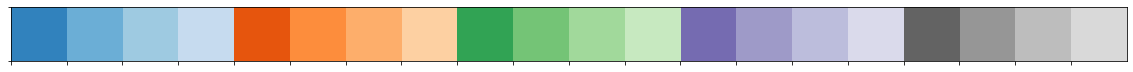

In [273]:
sns.palplot(sns.color_palette("tab20c"))

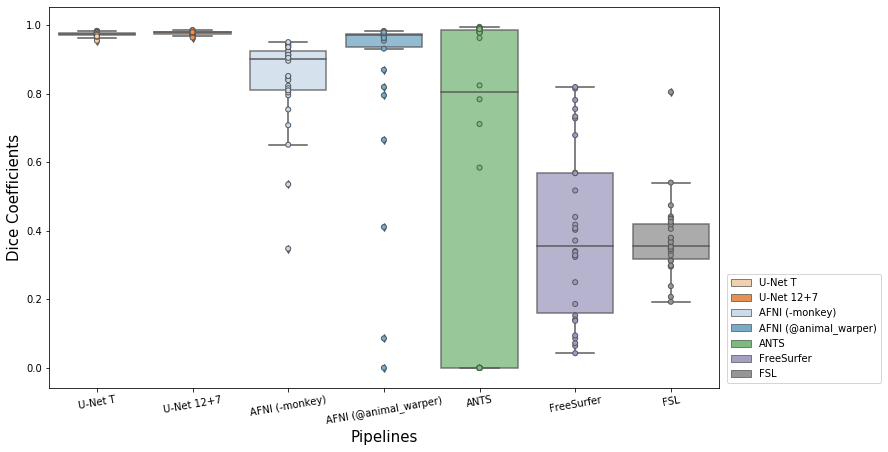

In [332]:
model = ['U-Net T','U-Net 12+7','AFNI (-monkey)','AFNI (@animal_warper)','ANTS','FreeSurfer','FSL']
data = []
for i,pipeline in enumerate(model):
    for j in range(30):
        row = [pipeline, j, dice[i,j]]
        data.append(row)

df = pd.DataFrame(data=data, columns=['Pipelines', 'Sub', 'Dice Coefficients'])

color_ind = [7,5,3,1,9,13,17]
colormap = []
for i in color_ind:
    colormap.append(sns.color_palette("tab20c")[i])

fig, ax = plt.subplots(figsize=(12,7))
ax = sns.boxplot(x="Pipelines",y="Dice Coefficients",hue="Pipelines",data=df,palette=colormap,boxprops=dict(alpha=0.8),dodge=False) # sns.color_palette("hls", 8)
ax = sns.stripplot(x="Pipelines",y="Dice Coefficients",data=df,jitter=False,dodge=True,marker='o',palette=colormap,linewidth=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
ax.set_xlabel("Pipelines",fontsize=15)
ax.set_ylabel("Dice Coefficients",fontsize=15)
ax.legend(loc=4,bbox_to_anchor=(1.25, 0))
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/dice.png',bbox_inches='tight',dpi=300)

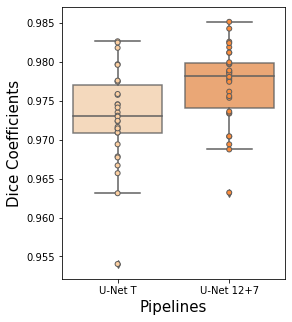

In [334]:
model = ['U-Net T','U-Net 12+7']
data = []
for i,pipeline in enumerate(model):
    for j in range(30):
        row = [pipeline, j, dice[i,j]]
        data.append(row)

df = pd.DataFrame(data=data, columns=['Pipelines', 'Sub', 'Dice Coefficients'])
fig, ax = plt.subplots(figsize=(4,5))
ax = sns.boxplot(x="Pipelines",y="Dice Coefficients",data=df,palette=colormap,boxprops=dict(alpha=0.8),dodge=False)
ax = sns.stripplot(x="Pipelines",y="Dice Coefficients",data=df,jitter=False,dodge=True, marker='o',palette=colormap,linewidth=1)
ax.set_xlabel("Pipelines",fontsize=15)
ax.set_ylabel("Dice Coefficients",fontsize=15)
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/dice_zoomin.png',bbox_inches='tight',dpi=300)

In [3]:
dice=np.zeros((7,30))
dice[0:2,:]=dice_v3[1:3,:] # T, 12+7,
dice[2,:]=dice_v3[4,:] # afni (-monkey)
dice[3,:]=dice_aw[1,:] # afni (aw)
dice[4:,:]=dice_v3[5:,:] # ants, fs, fsl

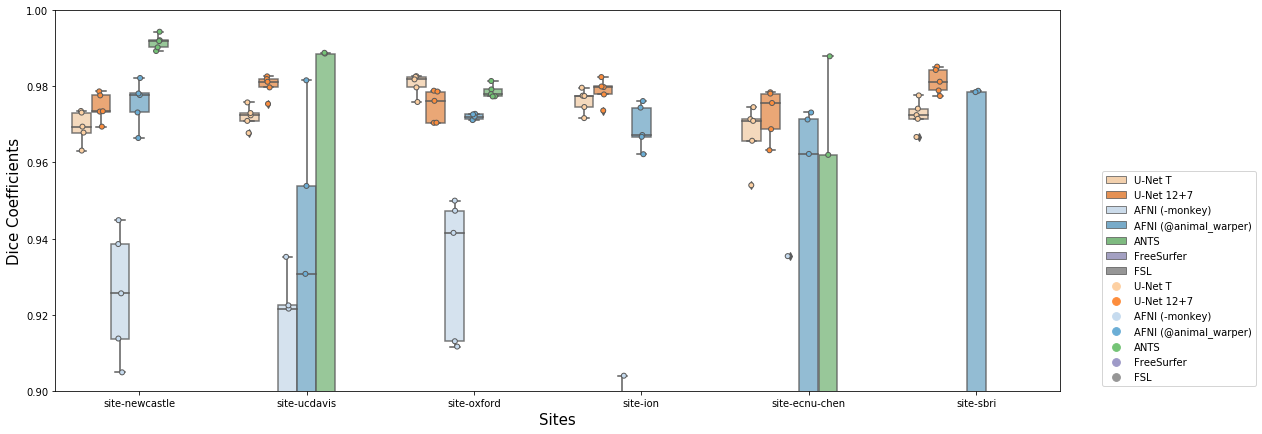

In [4]:
model = ['U-Net T','U-Net 12+7','AFNI (-monkey)','AFNI (@animal_warper)','ANTS','FreeSurfer','FSL']
site_list = ['site-newcastle', 'site-ucdavis', 'site-oxford', 'site-ion', 'site-ecnu-chen', 'site-sbri']
data=[]
for i,site in enumerate(site_list):
    for j,pipeline in enumerate(model):
        for k in range(5):
            row = [site, pipeline, k, dice[j,i*5+k]]
            data.append(row)

color_ind = [7,5,3,1,9,13,17]
colormap = []
for i in color_ind:
    colormap.append(sns.color_palette("tab20c")[i])

df = pd.DataFrame(data=data, columns=['Sites', 'Pipelines', 'Sub', 'Dice Coefficients'])
fig, ax = plt.subplots(figsize=(18,7))
ax = sns.boxplot(x="Sites",y="Dice Coefficients",hue="Pipelines",data=df,palette=colormap,boxprops=dict(alpha=0.8))
strip = sns.stripplot(x="Sites",y="Dice Coefficients",hue='Pipelines',data=df,jitter=True,dodge=True,marker='o',palette=colormap,linewidth=1)
ax.set_ylim(0.9,1)
ax.legend(loc=4,bbox_to_anchor=(1.2, 0))
ax.set_xlabel("Sites",fontsize=15)
ax.set_ylabel("Dice Coefficients",fontsize=15)
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/dice_site.png',bbox_inches='tight',dpi=300)

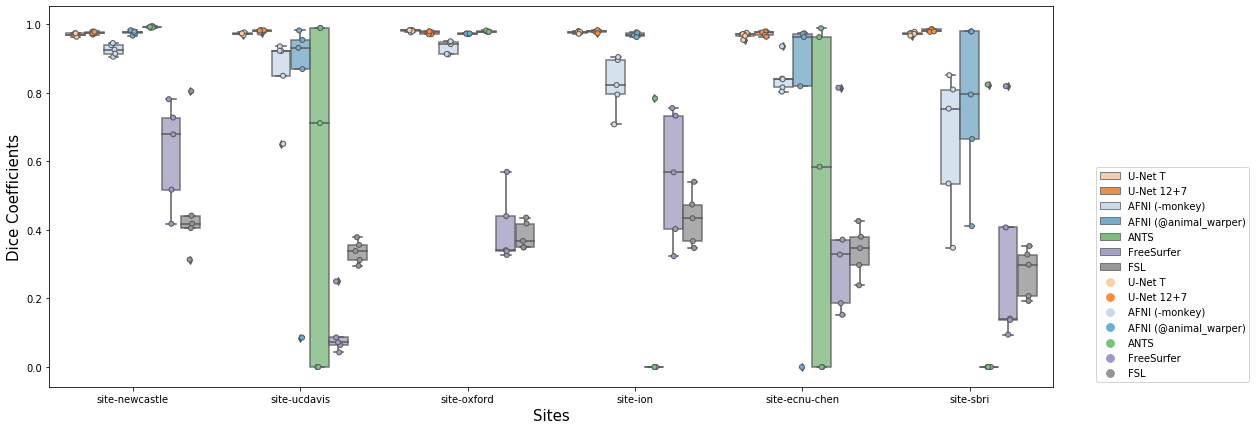

In [5]:
df = pd.DataFrame(data=data, columns=['Sites', 'Pipelines', 'Sub', 'Dice Coefficients'])
fig, ax = plt.subplots(figsize=(18,7))
ax = sns.boxplot(x="Sites",y="Dice Coefficients",hue="Pipelines",data=df,palette=colormap,boxprops=dict(alpha=0.8))
strip = sns.stripplot(x="Sites",y="Dice Coefficients",data=df,jitter=True,dodge=True,marker='o',hue='Pipelines',palette=colormap,linewidth=1)
ax.legend(loc=4,bbox_to_anchor=(1.2, 0))
ax.set_xlabel("Sites",fontsize=15)
ax.set_ylabel("Dice Coefficients",fontsize=15)
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/dice_site_overview.png',bbox_inches='tight',dpi=300)

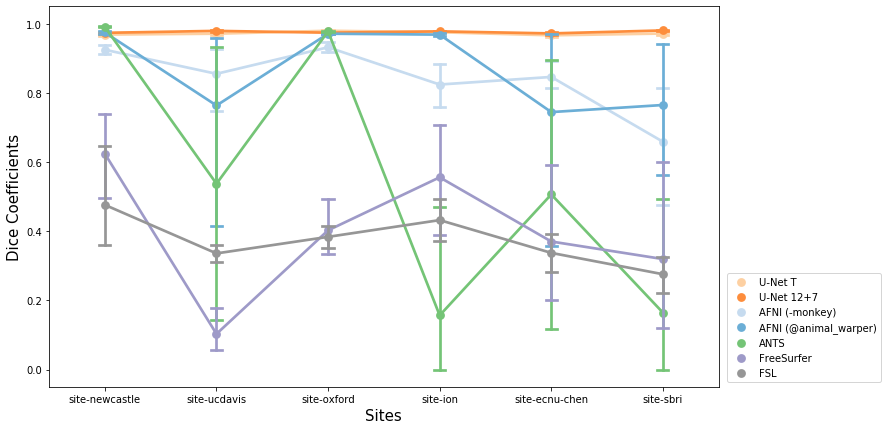

In [6]:
fig, ax = plt.subplots(figsize=(12,7))
ax = sns.pointplot(x="Sites", y="Dice Coefficients", hue="Pipelines", data=df, capsize=.1, palette=colormap)
ax.legend(loc=4,bbox_to_anchor=(1.25, 0))
ax.set_xlabel("Sites",fontsize=15)
ax.set_ylabel("Dice Coefficients",fontsize=15)
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/dice_site_point.png',bbox_inches='tight',dpi=300)

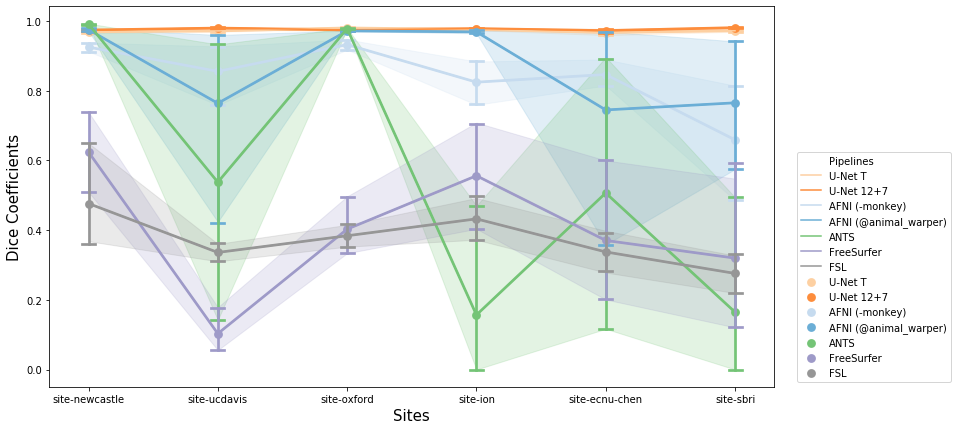

In [7]:
fig, ax = plt.subplots(figsize=(13,7))
ax = sns.pointplot(x="Sites", y="Dice Coefficients", hue="Pipelines", data=df, capsize=.1, palette=colormap)
ax = sns.lineplot(x="Sites", y="Dice Coefficients", hue="Pipelines", data=df, sort=False, palette=colormap)
ax.legend(loc=4,bbox_to_anchor=(1.25, 0))
ax.set_xlabel("Sites",fontsize=15)
ax.set_ylabel("Dice Coefficients",fontsize=15)
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/dice_site_point_errbar.png',bbox_inches='tight',dpi=300)

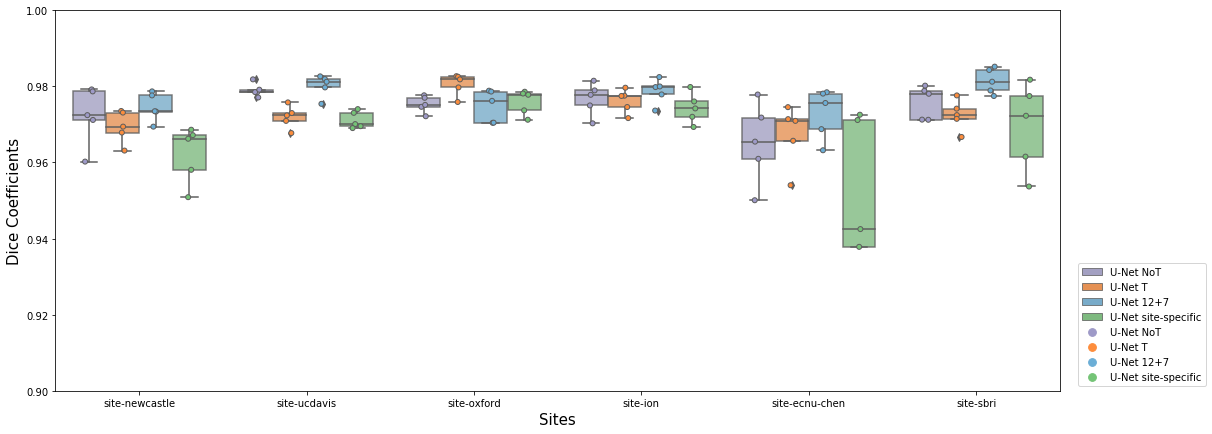

In [323]:
model = ['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific']
site_list = ['site-newcastle', 'site-ucdavis', 'site-oxford', 'site-ion', 'site-ecnu-chen', 'site-sbri']
data=[]
for i,site in enumerate(site_list):
    for j,pipeline in enumerate(model):
        for k in range(5):
            row = [site, pipeline, k, dice[j,i*5+k]]
            data.append(row)

color_ind = [13,5,1,9]
colormap = []
for i in color_ind:
    colormap.append(sns.color_palette("tab20c")[i])

df = pd.DataFrame(data=data, columns=['Sites', 'Pipelines', 'Sub', 'Dice Coefficients'])
fig, ax = plt.subplots(figsize=(18,7))
ax = sns.boxplot(x="Sites",y="Dice Coefficients",hue="Pipelines",data=df,palette=colormap,boxprops=dict(alpha=0.8))
strip = sns.stripplot(x="Sites",y="Dice Coefficients",data=df,jitter=True,dodge=True,marker='o',hue='Pipelines',palette=colormap,linewidth=1)
ax.set_ylim(0.9,1)
ax.legend(loc=4,bbox_to_anchor=(1.15, 0))
ax.set_xlabel("Sites",fontsize=15)
ax.set_ylabel("Dice Coefficients",fontsize=15)
# plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/dice_site_unet.png',bbox_inches='tight',dpi=300)

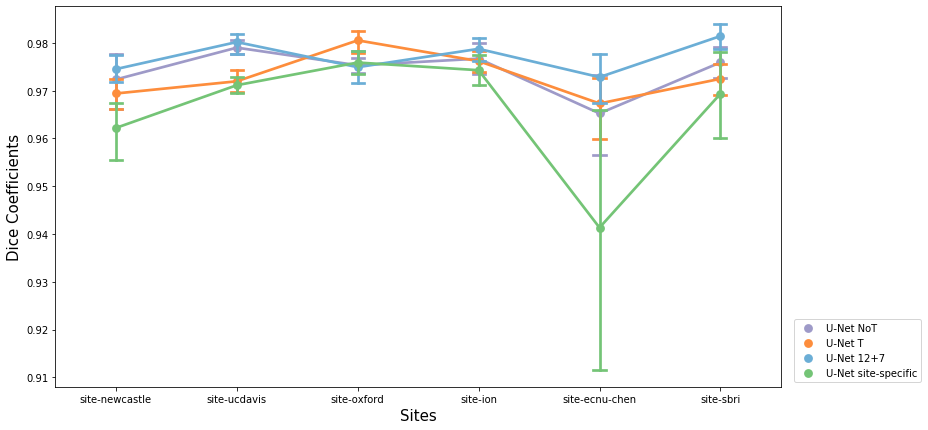

In [324]:
fig, ax = plt.subplots(figsize=(13,7))
ax = sns.pointplot(x="Sites", y="Dice Coefficients", hue="Pipelines", data=df, capsize=.1, palette=colormap)
ax.legend(loc=4,bbox_to_anchor=(1.2, 0))
ax.set_xlabel("Sites",fontsize=15)
ax.set_ylabel("Dice Coefficients",fontsize=15)
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/dice_site_point_unet.png',bbox_inches='tight',dpi=300)

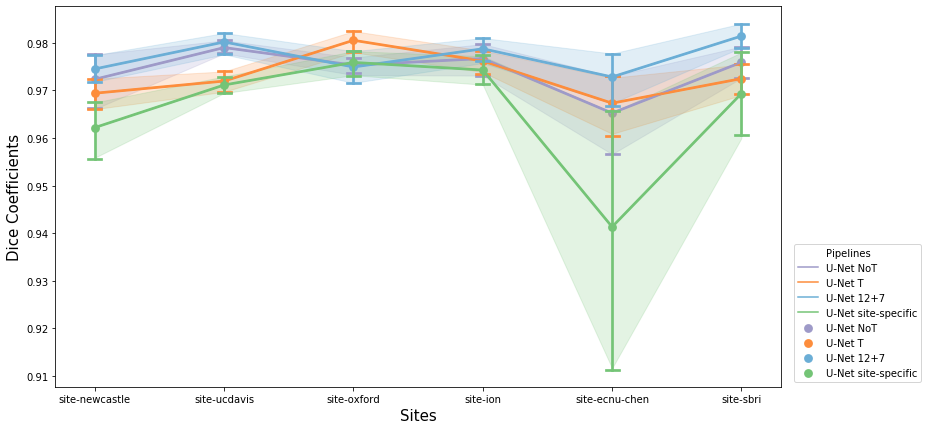

In [325]:
fig, ax = plt.subplots(figsize=(13,7))
ax = sns.pointplot(x="Sites", y="Dice Coefficients", hue="Pipelines", data=df, capsize=.1, palette=colormap)
ax = sns.lineplot(x="Sites", y="Dice Coefficients", hue="Pipelines", data=df, sort=False, palette=colormap)
ax.legend(loc=4,bbox_to_anchor=(1.2, 0))
ax.set_xlabel("Sites",fontsize=15)
ax.set_ylabel("Dice Coefficients",fontsize=15)
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/dice_site_point_unet_errbar.png',bbox_inches='tight',dpi=300)

In [306]:
fn_v3 = sio.loadmat('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/v3/FN.mat')
fn_v3 = fn_v3['FN']
tp_v3 = sio.loadmat('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/v3/TP.mat')
tp_v3 = tp_v3['TP']
specificity_v3 = sio.loadmat('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/v3/specificity.mat')
specificity_v3 = specificity_v3['specificity']
sensitivity_v3 = sio.loadmat('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/v3/sensitivity.mat')
sensitivity_v3 = sensitivity_v3['sensitivity']
precision_v3 = sio.loadmat('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/v3/precision.mat')
precision_v3 = precision_v3['precision']

fn_aw = sio.loadmat('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/v4/FN_nmt_aw.mat')
fn_aw = fn_aw['FN']
tp_aw = sio.loadmat('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/v4/TP_nmt_aw.mat')
tp_aw = tp_aw['TP']
specificity_aw = sio.loadmat('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/v4/specificity_nmt_aw.mat')
specificity_aw = specificity_aw['specificity']
sensitivity_aw = sio.loadmat('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/v4/sensitivity_nmt_aw.mat')
sensitivity_aw = sensitivity_aw['sensitivity']
precision_aw = sio.loadmat('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/v4/precision_nmt_aw.mat')
precision_aw = precision_aw['precision']

In [339]:
def convert(v3, aw):
    new = np.zeros((7,30))
    new[0:2,:] = v3[1:3,:] # NoT, T, 12+7
    new[2,:] = v3[4,:] # afni (-monkey)
    new[3,:] = aw[0,:] # afni (aw)
    new[4:,:] = v3[5:,:] # ants, fs, fsl
    return new

fn=convert(fn_v3,fn_aw)
tp=convert(tp_v3,tp_aw)
specificity=convert(specificity_v3,specificity_aw)
sensitivity=convert(sensitivity_v3,sensitivity_aw)
precision=convert(precision_v3,precision_aw)

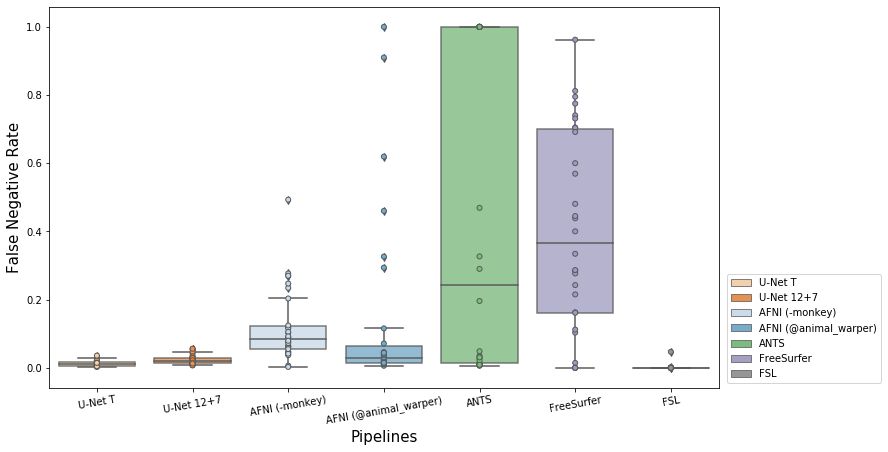

In [340]:
####################
#   FNR Box Plot   #
####################

model = ['U-Net T','U-Net 12+7','AFNI (-monkey)','AFNI (@animal_warper)','ANTS','FreeSurfer','FSL']

fnrs, fprs = [], []
for i,pipeline in enumerate(model):
    for j in range(30):
        fnr = fn[i,j]/(fn[i,j]+tp[i,j])
        row = [pipeline, j, fnr]
        fnrs.append(row)
        fpr = 1-specificity[i,j]
        row = [pipeline, j, fpr]
        fprs.append(row)

color_ind = [7,5,3,1,9,13,17]
colormap = []
for i in color_ind:
    colormap.append(sns.color_palette("tab20c")[i])

df = pd.DataFrame(data=fnrs, columns=['Pipelines', 'Sub', 'Dice Coefficients'])
fig, ax = plt.subplots(figsize=(12,7))
ax = sns.boxplot(x="Pipelines",y="Dice Coefficients",hue="Pipelines",data=df,palette=colormap,boxprops=dict(alpha=0.8),dodge=False)
ax = sns.stripplot(x="Pipelines",y="Dice Coefficients",data=df,jitter=False,dodge=True,marker='o',palette=colormap,linewidth=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
ax.set_xlabel("Pipelines",fontsize=15)
ax.set_ylabel("False Negative Rate",fontsize=15)
ax.legend(loc=4,bbox_to_anchor=(1.25, 0))
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/fnr.png',bbox_inches='tight',dpi=300)

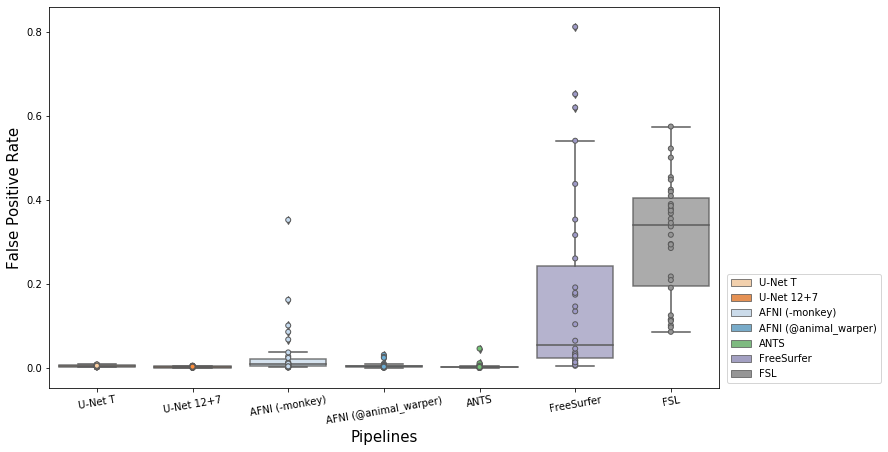

In [341]:
df = pd.DataFrame(data=fprs, columns=['Pipelines', 'Sub', 'Dice Coefficients'])
fig, ax = plt.subplots(figsize=(12,7))
ax = sns.boxplot(x="Pipelines",y="Dice Coefficients",hue="Pipelines",data=df,palette=colormap,boxprops=dict(alpha=0.8),dodge=False)
ax = sns.stripplot(x="Pipelines",y="Dice Coefficients",data=df,jitter=False,dodge=True,marker='o',palette=colormap,linewidth=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
ax.set_xlabel("Pipelines",fontsize=15)
ax.set_ylabel("False Positive Rate",fontsize=15)
ax.legend(loc=4,bbox_to_anchor=(1.25, 0))
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/fpr.png',bbox_inches='tight',dpi=300)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

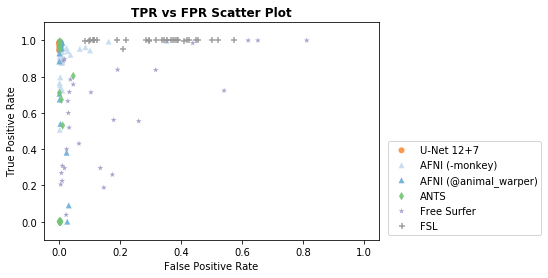

In [311]:
model = ['U-Net 12+7','AFNI (-monkey)','AFNI (@animal_warper)','ANTS','Free Surfer','FSL']
clevels = [0.5,0,0.2,0.3,0.4,0.9] #np.linspace(0., 1., len(model))
markers = ["o","^","^","d","*","+"]

color_ind = [5,3,1,9,13,17]
colormap = []
for i in color_ind:
    colormap.append(sns.color_palette("tab20c")[i])

fig, ax = plt.subplots(figsize=(6,4))
for i,m in enumerate(model):
    tpr = sensitivity[i+2,:]
    fpr = 1-specificity[i+2,:]
    ax.scatter(fpr, tpr, c=colormap[i], alpha=0.9, label=m, marker=markers[i], edgecolors='none')
ax.legend(loc=4,bbox_to_anchor=(1.5, 0))
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.1,1.1)
ax.set_title('TPR vs FPR Scatter Plot',fontweight='bold')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/roc.png',bbox_inches='tight',dpi=300)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

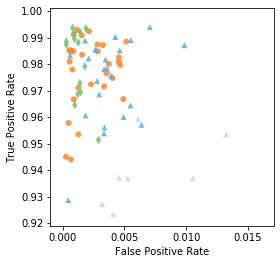

In [313]:
fig, ax = plt.subplots(figsize=(4,4))
for i,m in enumerate(model):
    tpr = sensitivity[i+2,:]
    fpr = 1-specificity[i+2,:]
    ax.scatter(fpr, tpr, c=colormap[i], alpha=0.9, label=m, marker=markers[i], edgecolors='none')
ax.set_xlim(-0.001,0.0171)#0.0221
ax.set_ylim(0.919,1.001)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/roc_zoomin.png',bbox_inches='tight',dpi=300)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

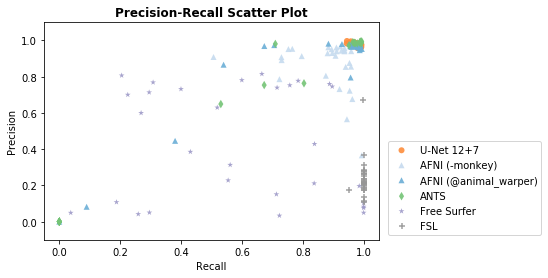

In [314]:
fig, ax = plt.subplots(figsize=(6,4))
for i,m in enumerate(model):
    recall = sensitivity[i+2,:]
    prec = precision[i+2,:]
    ax.scatter(recall, prec, c=colormap[i], alpha=0.9, label=m, marker=markers[i], edgecolors='none')
ax.legend(loc=4,bbox_to_anchor=(1.5, 0))
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.1,1.1)
ax.set_title('Precision-Recall Scatter Plot',fontweight='bold')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/precision-recall.png',bbox_inches='tight',dpi=300)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

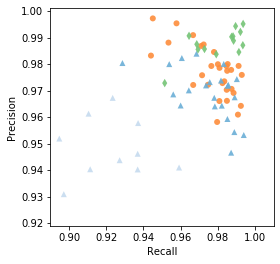

In [315]:
fig, ax = plt.subplots(figsize=(4,4))
for i,m in enumerate(model):
    recall = sensitivity[i+2,:]
    prec = precision[i+2,:]
    ax.scatter(recall, prec, c=colormap[i], alpha=0.9, label=m, marker=markers[i], edgecolors='none')
ax.set_xlim(0.89,1.01)#0.79
ax.set_ylim(0.919,1.001)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/precision-recall_zoomin.png',bbox_inches='tight',dpi=300)

In [11]:
dataframe = pd.read_excel ('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/consensus.xlsx')
print(dataframe)
arr = dataframe.to_numpy()

subid            site  T  12+7  afniSS  afni_aw  ants  fs  fsl
0    sub-032097  site-newcastle  1     1       5        2     7   8    6
1    sub-032100  site-newcastle  1     1       6        2     3  10    6
2    sub-032102  site-newcastle  1     4       6        2     3  10    8
3    sub-032104  site-newcastle  1     1       6        5    10   7    6
4    sub-032105  site-newcastle  1     2       6        1     3   9    8
..          ...             ... ..   ...     ...      ...   ...  ..  ...
131  sub-032307       site-sbri  1     1       7       10     8  10   10
132  sub-032308       site-sbri  1     1       6       10    10  10   10
133  sub-032309       site-sbri  5     1      10        1     2  10   10
134  sub-032310       site-sbri  4     1      10        2    10  10   10
135  sub-032311       site-sbri  6     1      10        2    10  10   10

[136 rows x 9 columns]


In [12]:
data = [] # pipeline, total, category 1/2/3/4
pipeline_list = ['U-Net T','U-Net 12+7','AFNI (-monkey)','AFNI (@animal_warper)','ANTS','FreeSurfer','FSL']
for k,j in enumerate(range(2,9)):
    cat1, cat2, cat3, cat4 = 0, 0, 0, 0
    for i in range(arr.shape[0]):
        if int(arr[i,j]) < 5:
            cat1 += 1
        elif int(arr[i,j]) == 5:
            cat2 += 1
        elif int(arr[i,j]) == 6:
            cat3 += 1
        elif int(arr[i,j]) > 6:
            cat4 += 1
    data.append([pipeline_list[k], 136, cat1, cat2, cat3, cat4])

In [13]:
data_cumulative = []
for i in range(len(data)):
    good = data[i][2]
    fair = data[i][2]+data[i][3]
    bad = data[i][2]+data[i][3]+data[i][4]
    data_cumulative.append([data[i][0], 136, good, fair, bad])

In [14]:
df = pd.DataFrame(data=data_cumulative, columns=['Pipelines', 'Total', 'Good', 'Fair', 'Bad'])

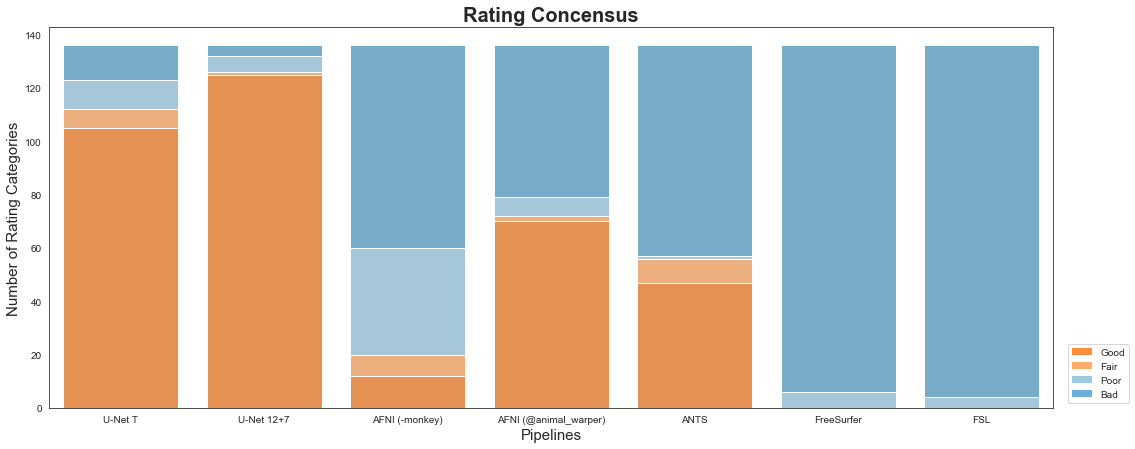

In [24]:
sns.set_style(style='white')
fig, ax = plt.subplots(figsize=(18,7))
ax = sns.barplot(x='Pipelines',y='Total',data=df, color=sns.color_palette("tab20c")[1])
ax = sns.barplot(x='Pipelines',y='Bad',data=df, color=sns.color_palette("tab20c")[2])
ax = sns.barplot(x='Pipelines',y='Fair',data=df, color=sns.color_palette("tab20c")[6])
ax = sns.barplot(x='Pipelines',y='Good',data=df, color=sns.color_palette("tab20c")[5])
ax.set_title("Rating Concensus",fontsize=20,fontweight='bold')
ax.set_xlabel("Pipelines",fontsize=15)
ax.set_ylabel("Number of Rating Categories",fontsize=15)

bar1 = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab20c")[1], edgecolor = 'none')
bar2 = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab20c")[2],  edgecolor = 'none')
bar3 = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab20c")[6], edgecolor = 'none')
bar4 = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab20c")[5],  edgecolor = 'none')
l = plt.legend([bar4,bar3,bar2,bar1], ['Good','Fair','Poor','Bad'], loc=4, ncol = 1, bbox_to_anchor=(1.08, 0))
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/rating_consensus.png',bbox_inches='tight',dpi=300)

In [277]:
data = []
current_site = arr[0,1]
cat1, cat2, cat3, cat4, count = 0, 0, 0, 0, 0
j = 2

for i in range(arr.shape[0]):
    site = arr[i,1]
    if site != current_site:
        data.append([current_site, count, cat1, cat2, cat3, cat4])
        current_site = site
        cat1, cat2, cat3, cat4, count = 0, 0, 0, 0, 0
    
    if int(arr[i,j]) < 5:
        cat1 += 1
    elif int(arr[i,j]) == 5:
        cat2 += 1
    elif int(arr[i,j]) == 6:
        cat3 += 1
    elif int(arr[i,j]) > 6:
        cat4 += 1
    
    count = count + 1

data.append([current_site, count, cat1, cat2, cat3, cat4])

In [278]:
data

[['site-newcastle', 10, 9, 0, 1, 0],
 ['site-NIMH', 3, 0, 0, 0, 3],
 ['site-princeton', 2, 2, 0, 0, 0],
 ['site-rockefeller', 6, 1, 0, 0, 5],
 ['site-uminn', 2, 2, 0, 0, 0],
 ['site-ucdavis', 19, 19, 0, 0, 0],
 ['site-nki', 2, 0, 1, 1, 0],
 ['site-mountsinai-P', 9, 9, 0, 0, 0],
 ['site-mountsinai-S', 5, 2, 0, 2, 1],
 ['site-oxford', 20, 19, 0, 0, 1],
 ['site-uwo', 3, 0, 1, 2, 0],
 ['site-ion', 8, 8, 0, 0, 0],
 ['site-mcgill', 1, 0, 0, 0, 1],
 ['site-ecnu', 4, 2, 1, 1, 0],
 ['site-amu', 4, 1, 2, 0, 1],
 ['site-ohsu', 2, 2, 0, 0, 0],
 ['site-nin', 2, 0, 0, 1, 1],
 ['site-lyon', 4, 2, 0, 2, 0],
 ['site-ecnu-chen', 8, 7, 1, 0, 0],
 ['site-sbri', 22, 20, 1, 1, 0]]

In [279]:
data_cumulative = []
for i in range(len(data)):
    good = data[i][2]/data[i][1]
    fair = (data[i][2]+data[i][3])/data[i][1]
    bad = (data[i][2]+data[i][3]+data[i][4])/data[i][1]
    data_cumulative.append([data[i][0], data[i][1], 1, good, fair, bad])

In [194]:
data_cumulative

[['site-newcastle', 10, 1, 0.1, 0.2, 0.9],
 ['site-NIMH', 3, 1, 0.0, 0.0, 0.0],
 ['site-princeton', 2, 1, 0.0, 0.0, 0.0],
 ['site-rockefeller', 6, 1, 0.0, 0.0, 0.5],
 ['site-uminn', 2, 1, 0.0, 0.0, 0.0],
 ['site-ucdavis', 19, 1, 0.0, 0.05263157894736842, 0.42105263157894735],
 ['site-nki', 2, 1, 0.0, 0.0, 0.0],
 ['site-mountsinai-P', 9, 1, 0.0, 0.0, 0.3333333333333333],
 ['site-mountsinai-S', 5, 1, 0.0, 0.0, 0.4],
 ['site-oxford', 20, 1, 0.55, 0.75, 0.9],
 ['site-uwo', 3, 1, 0.0, 0.0, 0.0],
 ['site-ion', 8, 1, 0.0, 0.125, 0.5],
 ['site-mcgill', 1, 1, 0.0, 0.0, 0.0],
 ['site-ecnu', 4, 1, 0.0, 0.0, 0.75],
 ['site-amu', 4, 1, 0.0, 0.0, 0.0],
 ['site-ohsu', 2, 1, 0.0, 0.0, 0.5],
 ['site-nin', 2, 1, 0.0, 0.5, 1.0],
 ['site-lyon', 4, 1, 0.0, 0.0, 0.0],
 ['site-ecnu-chen', 8, 1, 0.0, 0.0, 0.25],
 ['site-sbri', 22, 1, 0.0, 0.0, 0.22727272727272727]]

In [280]:
data_sorted = []

for i,j in enumerate(site_list):
    for k in data_cumulative:
        if (k[0]==site_list[i]):
            data_sorted.append(k)

In [281]:
data_sorted

[['site-sbri', 22, 1, 0.9090909090909091, 0.9545454545454546, 1.0],
 ['site-ucdavis', 19, 1, 1.0, 1.0, 1.0],
 ['site-newcastle', 10, 1, 0.9, 0.9, 1.0],
 ['site-mountsinai-P', 9, 1, 1.0, 1.0, 1.0],
 ['site-ion', 8, 1, 1.0, 1.0, 1.0],
 ['site-ecnu-chen', 8, 1, 0.875, 1.0, 1.0],
 ['site-ecnu', 4, 1, 0.5, 0.75, 1.0],
 ['site-amu', 4, 1, 0.25, 0.75, 0.75],
 ['site-lyon', 4, 1, 0.5, 0.5, 1.0],
 ['site-uwo', 3, 1, 0.0, 0.3333333333333333, 1.0],
 ['site-princeton', 2, 1, 1.0, 1.0, 1.0],
 ['site-uminn', 2, 1, 1.0, 1.0, 1.0],
 ['site-nki', 2, 1, 0.0, 0.5, 1.0],
 ['site-ohsu', 2, 1, 1.0, 1.0, 1.0],
 ['site-nin', 2, 1, 0.0, 0.0, 0.5],
 ['site-oxford', 20, 1, 0.95, 0.95, 0.95],
 ['site-rockefeller',
  6,
  1,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666],
 ['site-NIMH', 3, 1, 0.0, 0.0, 0.0],
 ['site-mountsinai-S', 5, 1, 0.4, 0.4, 0.8],
 ['site-mcgill', 1, 1, 0.0, 0.0, 0.0]]

In [158]:
data_sorted1 = sorted(data_cumulative, key=lambda x: x[3], reverse=True)

In [159]:
data_sorted1

[['site-newcastle', 10, 1, 1.0, 1.0, 1.0],
 ['site-princeton', 2, 1, 1.0, 1.0, 1.0],
 ['site-uminn', 2, 1, 1.0, 1.0, 1.0],
 ['site-ucdavis', 19, 1, 1.0, 1.0, 1.0],
 ['site-nki', 2, 1, 1.0, 1.0, 1.0],
 ['site-mountsinai-P', 9, 1, 1.0, 1.0, 1.0],
 ['site-uwo', 3, 1, 1.0, 1.0, 1.0],
 ['site-ion', 8, 1, 1.0, 1.0, 1.0],
 ['site-ecnu', 4, 1, 1.0, 1.0, 1.0],
 ['site-amu', 4, 1, 1.0, 1.0, 1.0],
 ['site-ohsu', 2, 1, 1.0, 1.0, 1.0],
 ['site-nin', 2, 1, 1.0, 1.0, 1.0],
 ['site-lyon', 4, 1, 1.0, 1.0, 1.0],
 ['site-ecnu-chen', 8, 1, 1.0, 1.0, 1.0],
 ['site-sbri', 22, 1, 1.0, 1.0, 1.0],
 ['site-oxford', 20, 1, 0.95, 0.95, 0.95],
 ['site-rockefeller', 6, 1, 0.5, 0.6666666666666666, 1.0],
 ['site-NIMH',
  3,
  1,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333],
 ['site-mountsinai-S', 5, 1, 0.2, 0.2, 1.0],
 ['site-mcgill', 1, 1, 0.0, 0.0, 0.0]]

In [168]:
data_sorted2 = sorted(data_sorted1[0:15], key=lambda x: x[1], reverse=True)

In [169]:
data_sorted2

[['site-sbri', 22, 1, 1.0, 1.0, 1.0],
 ['site-ucdavis', 19, 1, 1.0, 1.0, 1.0],
 ['site-newcastle', 10, 1, 1.0, 1.0, 1.0],
 ['site-mountsinai-P', 9, 1, 1.0, 1.0, 1.0],
 ['site-ion', 8, 1, 1.0, 1.0, 1.0],
 ['site-ecnu-chen', 8, 1, 1.0, 1.0, 1.0],
 ['site-ecnu', 4, 1, 1.0, 1.0, 1.0],
 ['site-amu', 4, 1, 1.0, 1.0, 1.0],
 ['site-lyon', 4, 1, 1.0, 1.0, 1.0],
 ['site-uwo', 3, 1, 1.0, 1.0, 1.0],
 ['site-princeton', 2, 1, 1.0, 1.0, 1.0],
 ['site-uminn', 2, 1, 1.0, 1.0, 1.0],
 ['site-nki', 2, 1, 1.0, 1.0, 1.0],
 ['site-ohsu', 2, 1, 1.0, 1.0, 1.0],
 ['site-nin', 2, 1, 1.0, 1.0, 1.0]]

In [170]:
data_sorted = data_sorted2 + data_sorted1[15:]

In [171]:
data_sorted

[['site-sbri', 22, 1, 1.0, 1.0, 1.0],
 ['site-ucdavis', 19, 1, 1.0, 1.0, 1.0],
 ['site-newcastle', 10, 1, 1.0, 1.0, 1.0],
 ['site-mountsinai-P', 9, 1, 1.0, 1.0, 1.0],
 ['site-ion', 8, 1, 1.0, 1.0, 1.0],
 ['site-ecnu-chen', 8, 1, 1.0, 1.0, 1.0],
 ['site-ecnu', 4, 1, 1.0, 1.0, 1.0],
 ['site-amu', 4, 1, 1.0, 1.0, 1.0],
 ['site-lyon', 4, 1, 1.0, 1.0, 1.0],
 ['site-uwo', 3, 1, 1.0, 1.0, 1.0],
 ['site-princeton', 2, 1, 1.0, 1.0, 1.0],
 ['site-uminn', 2, 1, 1.0, 1.0, 1.0],
 ['site-nki', 2, 1, 1.0, 1.0, 1.0],
 ['site-ohsu', 2, 1, 1.0, 1.0, 1.0],
 ['site-nin', 2, 1, 1.0, 1.0, 1.0],
 ['site-oxford', 20, 1, 0.95, 0.95, 0.95],
 ['site-rockefeller', 6, 1, 0.5, 0.6666666666666666, 1.0],
 ['site-NIMH',
  3,
  1,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333],
 ['site-mountsinai-S', 5, 1, 0.2, 0.2, 1.0],
 ['site-mcgill', 1, 1, 0.0, 0.0, 0.0]]

In [172]:
df = pd.DataFrame(data=data_sorted, columns=['Pipelines', 'Count', 'Total', 'Good', 'Fair', 'Bad'])

In [282]:
df_unet_T = pd.DataFrame(data=data_sorted, columns=['Pipelines', 'Count', 'Total', 'Good', 'Fair', 'Bad'])

In [205]:
df_afni = pd.DataFrame(data=data_sorted, columns=['Pipelines', 'Count', 'Total', 'Good', 'Fair', 'Bad'])

In [219]:
df_afniaw = pd.DataFrame(data=data_sorted, columns=['Pipelines', 'Count', 'Total', 'Good', 'Fair', 'Bad'])

In [225]:
df_ants = pd.DataFrame(data=data_sorted, columns=['Pipelines', 'Count', 'Total', 'Good', 'Fair', 'Bad'])

In [182]:
site_list = []
size_list = []
count_list = []
for i in range(0,len(data)):
    site_list.append(data_sorted[i][0])
    size_list.append(str(data_sorted[i][1]))
    count_list.append(data_sorted[i][1]*100)

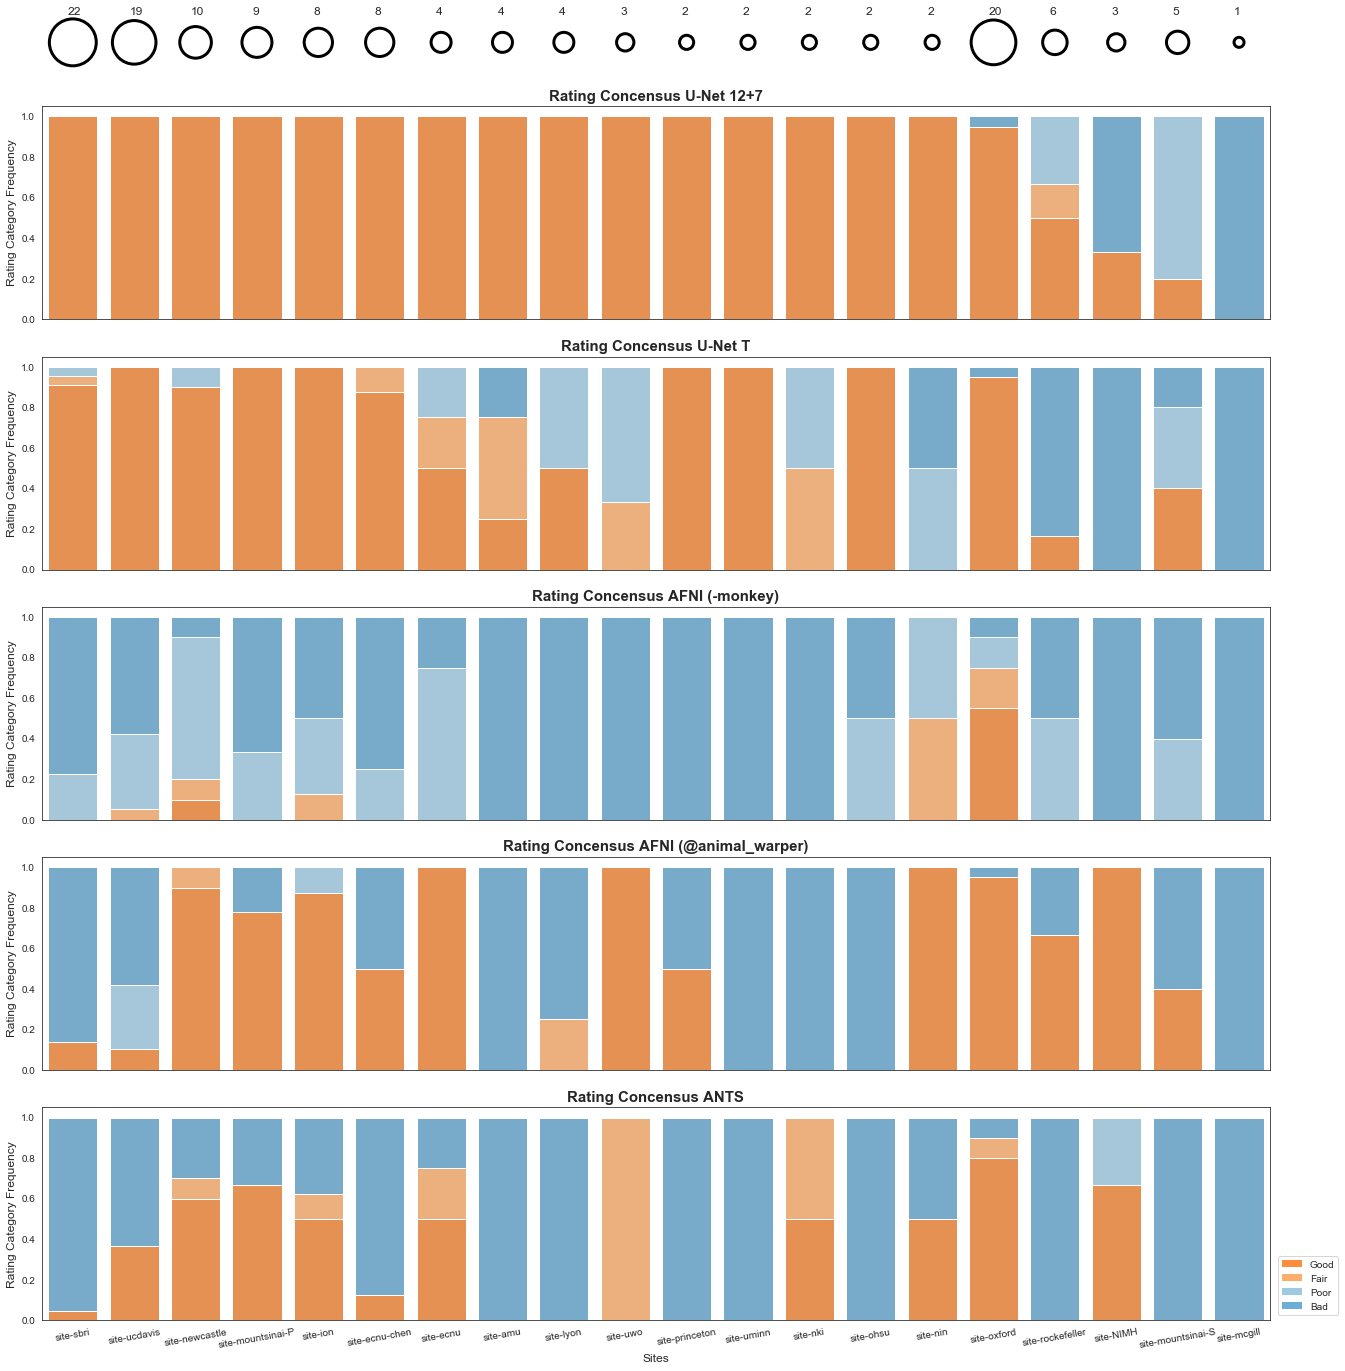

In [285]:
def plotbar(ind, dataframe, pipeline, last=False):
    axs[ind] = sns.barplot(x='Pipelines',y='Total',data=dataframe, color=sns.color_palette("tab20c")[1], ax=axs[ind])
    axs[ind] = sns.barplot(x='Pipelines',y='Bad',data=dataframe, color=sns.color_palette("tab20c")[2], ax=axs[ind])
    axs[ind] = sns.barplot(x='Pipelines',y='Fair',data=dataframe, color=sns.color_palette("tab20c")[6], ax=axs[ind])
    axs[ind] = sns.barplot(x='Pipelines',y='Good',data=dataframe, color=sns.color_palette("tab20c")[5], ax=axs[ind])
    if not last:
        axs[ind].set_xlabel([])
        axs[ind].set_xticklabels([])
        axs[ind].axes.get_xaxis().set_visible(False)
    else: 
        axs[ind].set_xlabel("Sites",fontsize=12)
        axs[ind].set_xticklabels(axs[ind].get_xticklabels(), rotation=10)
    axs[ind].set_title(f"Rating Concensus {pipeline}",fontsize=15,fontweight='bold')
    axs[ind].set_ylabel("Rating Category Frequency",fontsize=12)

sns.set_style(style='white')
fig, axs = plt.subplots(6,1,figsize=(22,24),gridspec_kw={'height_ratios': [1,4,4,4,4,4]})

axs[0].scatter(x,y,s=count_list,c='white',edgecolors='black',linewidths=3)
for i in range(0,20):
    axs[0].text(x[i]-0.08, y[i]+0.5, size_list[i], size=12)
axs[0].set_xlim(-0.5,19.5)
axs[0].axis('off')
axs[0].set_ylabel("Sample Size",fontsize=15)

plotbar(1, df, "U-Net 12+7")
plotbar(2, df_unet_T, "U-Net T")
plotbar(3, df_afni, "AFNI (-monkey)")
plotbar(4, df_afniaw, "AFNI (@animal_warper)")
plotbar(5, df_ants, "ANTS", True)

bar1 = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab20c")[1], edgecolor = 'none')
bar2 = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab20c")[2],  edgecolor = 'none')
bar3 = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab20c")[6], edgecolor = 'none')
bar4 = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab20c")[5],  edgecolor = 'none')
l = plt.legend([bar4,bar3,bar2,bar1], ['Good','Fair','Poor','Bad'], loc=4, ncol=1, bbox_to_anchor=(1.06, 0))
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/rating_site_unetT.png',bbox_inches='tight',dpi=300)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


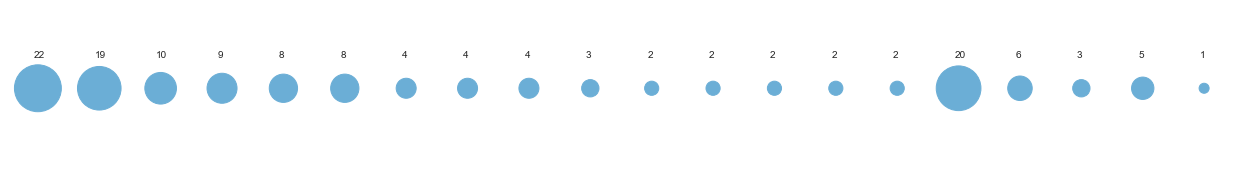

In [257]:
fig, ax = plt.subplots(figsize=(22,3))
ax.scatter(x, y, s=count_list, c=sns.color_palette("tab20c")[1])
for i in range(0,20):
    ax.text(x[i]-0.07, y[i]+0.06, size_list[i], size=10)
ax.set_xlim(-0.5,19.5)
ax.axis('off')
ax.set_ylabel("Sample Size",fontsize=15)
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/sample_size.png',bbox_inches='tight',dpi=300,transparent=True)

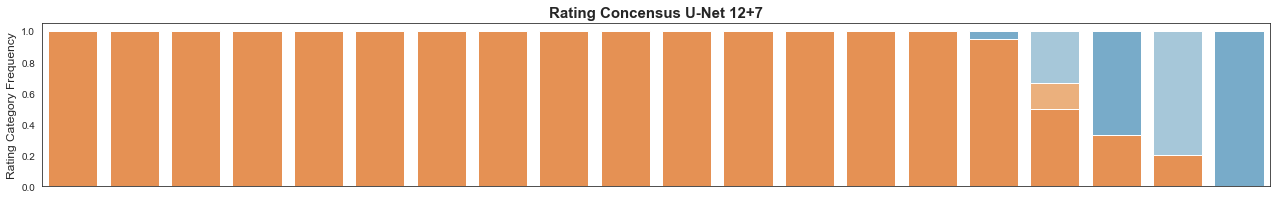

In [246]:
fig, ax = plt.subplots(figsize=(22,3))
ax = sns.barplot(x='Pipelines',y='Total',data=df, color=sns.color_palette("tab20c")[1])
ax = sns.barplot(x='Pipelines',y='Bad',data=df, color=sns.color_palette("tab20c")[2])
ax = sns.barplot(x='Pipelines',y='Fair',data=df, color=sns.color_palette("tab20c")[6])
ax = sns.barplot(x='Pipelines',y='Good',data=df, color=sns.color_palette("tab20c")[5])
ax.set_title("Rating Concensus U-Net 12+7",fontsize=15,fontweight='bold')
ax.set_xlabel([])
ax.set_xticklabels([])
ax.axes.get_xaxis().set_visible(False)
ax.set_ylabel("Rating Category Frequency",fontsize=12)
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/rating_consensus_unet.png',bbox_inches='tight',dpi=300)

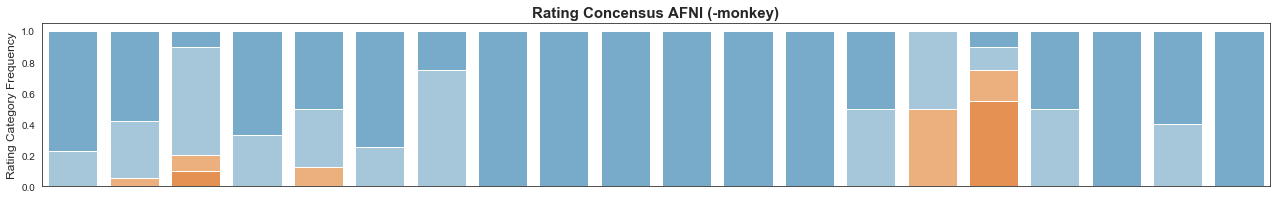

In [247]:
fig, ax = plt.subplots(figsize=(22,3))
ax = sns.barplot(x='Pipelines',y='Total',data=df_afni, color=sns.color_palette("tab20c")[1])
ax = sns.barplot(x='Pipelines',y='Bad',data=df_afni, color=sns.color_palette("tab20c")[2])
ax = sns.barplot(x='Pipelines',y='Fair',data=df_afni, color=sns.color_palette("tab20c")[6])
ax = sns.barplot(x='Pipelines',y='Good',data=df_afni, color=sns.color_palette("tab20c")[5])
ax.set_title("Rating Concensus AFNI (-monkey)",fontsize=15,fontweight='bold')
ax.set_xlabel([])
ax.set_xticklabels([])
ax.axes.get_xaxis().set_visible(False)
ax.set_ylabel("Rating Category Frequency",fontsize=12)
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/rating_consensus_afni.png',bbox_inches='tight',dpi=300)

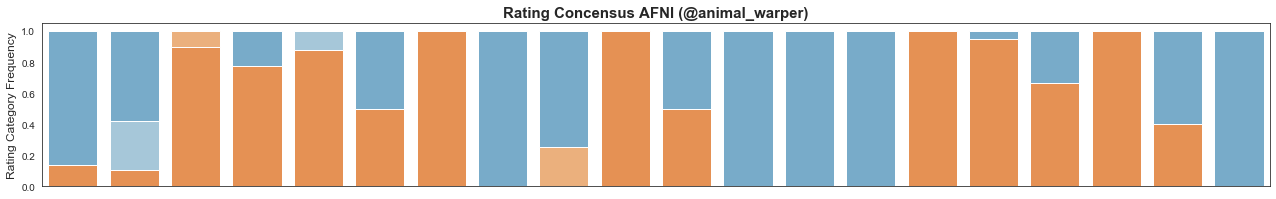

In [248]:
fig, ax = plt.subplots(figsize=(22,3))
ax = sns.barplot(x='Pipelines',y='Total',data=df_afniaw, color=sns.color_palette("tab20c")[1])
ax = sns.barplot(x='Pipelines',y='Bad',data=df_afniaw, color=sns.color_palette("tab20c")[2])
ax = sns.barplot(x='Pipelines',y='Fair',data=df_afniaw, color=sns.color_palette("tab20c")[6])
ax = sns.barplot(x='Pipelines',y='Good',data=df_afniaw, color=sns.color_palette("tab20c")[5])
ax.set_title("Rating Concensus AFNI (@animal_warper)",fontsize=15,fontweight='bold')
ax.set_xlabel([])
ax.set_xticklabels([])
ax.axes.get_xaxis().set_visible(False)
ax.set_ylabel("Rating Category Frequency",fontsize=12)
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/rating_consensus_afniaw.png',bbox_inches='tight',dpi=300)

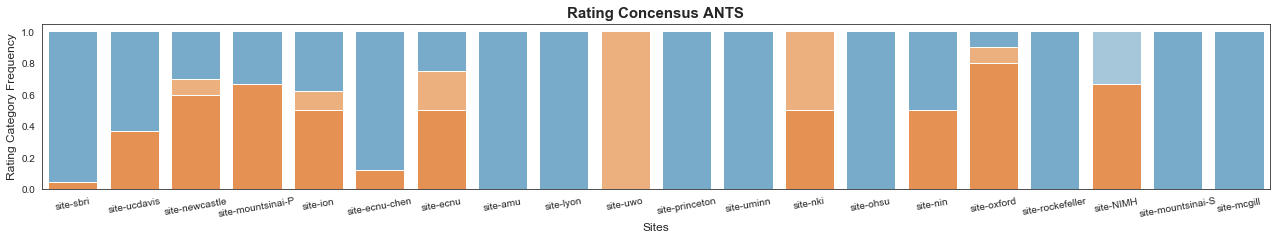

In [250]:
fig, ax = plt.subplots(figsize=(22,3.05))
ax = sns.barplot(x='Pipelines',y='Total',data=df_ants, color=sns.color_palette("tab20c")[1])
ax = sns.barplot(x='Pipelines',y='Bad',data=df_ants, color=sns.color_palette("tab20c")[2])
ax = sns.barplot(x='Pipelines',y='Fair',data=df_ants, color=sns.color_palette("tab20c")[6])
ax = sns.barplot(x='Pipelines',y='Good',data=df_ants, color=sns.color_palette("tab20c")[5])
ax.set_title("Rating Concensus ANTS",fontsize=15,fontweight='bold')
ax.set_xlabel("Sites",fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
ax.set_ylabel("Rating Category Frequency",fontsize=12)
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/rating_consensus_ants.png',bbox_inches='tight',dpi=300)

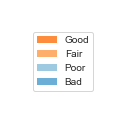

In [245]:
fig, ax = plt.subplots(figsize=(2,2))
bar1 = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab20c")[1], edgecolor = 'none')
bar2 = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab20c")[2],  edgecolor = 'none')
bar3 = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab20c")[6], edgecolor = 'none')
bar4 = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab20c")[5],  edgecolor = 'none')
l = plt.legend([bar4,bar3,bar2,bar1], ['Good','Fair','Poor','Bad'],loc='center')
plt.axis('off')
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/rating_colorbar.png',bbox_inches='tight',dpi=300,transparent=True)

In [ ]:
fig, ax = plt.subplots(figsize=(22,4))
ax = sns.barplot(x='Pipelines',y='Total',data=df_afniaw, color=sns.color_palette("tab20c")[1])
ax = sns.barplot(x='Pipelines',y='Bad',data=df_afniaw, color=sns.color_palette("tab20c")[2])
ax = sns.barplot(x='Pipelines',y='Fair',data=df_afniaw, color=sns.color_palette("tab20c")[6])
ax = sns.barplot(x='Pipelines',y='Good',data=df_afniaw, color=sns.color_palette("tab20c")[5])
ax.set_title("Rating Concensus AFNI (@animal_warper)",fontsize=15,fontweight='bold')
ax.set_xlabel([])
ax.set_xticklabels([])
ax.axes.get_xaxis().set_visible(False)
ax.set_ylabel("Rating Category Frequency",fontsize=12)

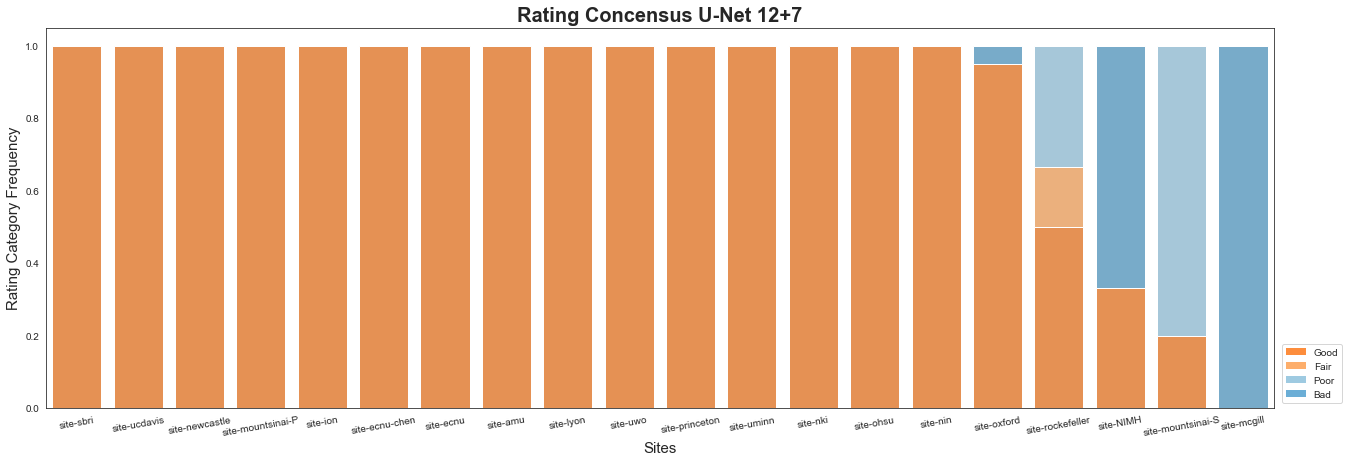

In [174]:
sns.set_style(style='white')
fig, ax = plt.subplots(figsize=(22,7))
ax = sns.barplot(x='Pipelines',y='Total',data=df, color=sns.color_palette("tab20c")[1])
ax = sns.barplot(x='Pipelines',y='Bad',data=df, color=sns.color_palette("tab20c")[2])
ax = sns.barplot(x='Pipelines',y='Fair',data=df, color=sns.color_palette("tab20c")[6])
ax = sns.barplot(x='Pipelines',y='Good',data=df, color=sns.color_palette("tab20c")[5])
ax.set_title("Rating Concensus U-Net 12+7",fontsize=20,fontweight='bold')
ax.set_xlabel("Sites",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
ax.set_ylabel("Rating Category Frequency",fontsize=15)

bar1 = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab20c")[1], edgecolor = 'none')
bar2 = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab20c")[2],  edgecolor = 'none')
bar3 = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab20c")[6], edgecolor = 'none')
bar4 = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab20c")[5],  edgecolor = 'none')
l = plt.legend([bar4,bar3,bar2,bar1], ['Good','Fair','Poor','Bad'], loc=4, ncol=1, bbox_to_anchor=(1.06, 0))
# plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/rating_consensus_unet.png',bbox_inches='tight',dpi=300)

In [262]:
data_list = []
x = []
y = []
for i in range(0,len(data)):
    data_list.append([data[i][0],data[i][1]])
    x.append(i)
    y.append(1)

In [115]:
sorted_data_list = sorted(data_list, key=lambda x: x[1])

In [116]:
sorted_data_list

[['site-mcgill', 1],
 ['site-princeton', 2],
 ['site-uminn', 2],
 ['site-nki', 2],
 ['site-ohsu', 2],
 ['site-nin', 2],
 ['site-NIMH', 3],
 ['site-uwo', 3],
 ['site-ecnu', 4],
 ['site-amu', 4],
 ['site-lyon', 4],
 ['site-mountsinai-S', 5],
 ['site-rockefeller', 6],
 ['site-ion', 8],
 ['site-ecnu-chen', 8],
 ['site-mountsinai-P', 9],
 ['site-newcastle', 10],
 ['site-ucdavis', 19],
 ['site-oxford', 20],
 ['site-sbri', 22]]

In [130]:
site_list = []
size_list = []
count_list = []
for i in range(0,len(data)):
    site_list.append(sorted_data_list[i][0])
    size_list.append(str(sorted_data_list[i][1]))
    count_list.append(sorted_data_list[i][1]*100)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


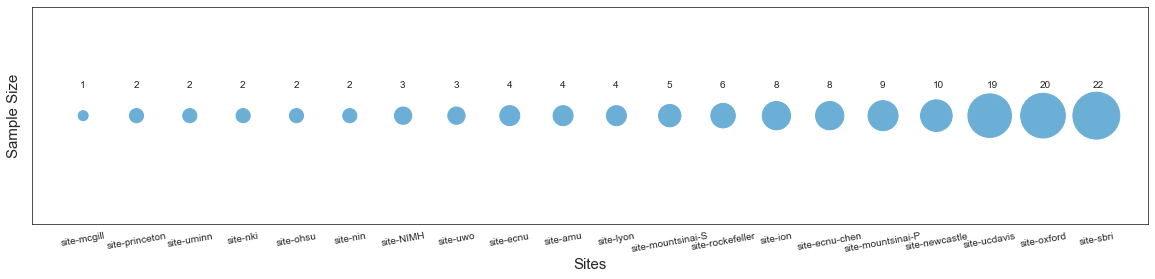

In [151]:
plt.figure(figsize=(20, 4))
plt.scatter(x, y, s=count_list, c=sns.color_palette("tab20c")[1])
for i in range(0,20):
    plt.text(x[i]-0.06, y[i]+0.03, size_list[i], size=10)
plt.xlabel('Sites',fontsize=15)
plt.ylabel('Sample Size',fontsize=15)
plt.xticks(x, site_list, rotation=10)
plt.yticks(y, [])
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/site_samplesize.png',bbox_inches='tight',dpi=300)

In [97]:
def read_excel(sheetname):
    dataframe = pd.read_excel ('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/Release1.xlsx', sheet_name=sheetname)
    arr = dataframe.to_numpy()
    return arr

arr1 = read_excel("TX")
arr2 = read_excel("JC")
arr3 = read_excel("XL")

In [99]:
def str2int(string):
    if string != '-':
        if int(string) < 5:
            integer = 1
        elif int(string) == 5:
            integer = 2
        elif int(string) == 6:
            integer = 3
        elif int(string) > 6:
            integer = 4
    else:
        integer = 4
    return integer

concensus = np.zeros((arr.shape[0],7))
for k,j in enumerate(range(3,10)):
    for i in range(arr.shape[0]):
        v1 = str2int(arr1[i,j])
        v2 = str2int(arr2[i,j])
        v3 = str2int(arr3[i,j])
        if not (v1==v2 and v2==v3):
            concensus[i,k]=1
        else:
            concensus[i,k]=0

In [101]:
from numpy import savetxt
savetxt('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/paper/consensus.csv', concensus, delimiter=',')

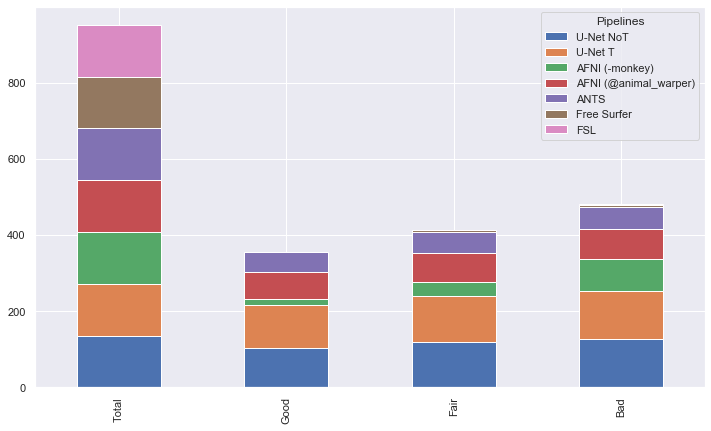

In [58]:
df.set_index('Pipelines').T.plot(kind='bar', stacked=True)

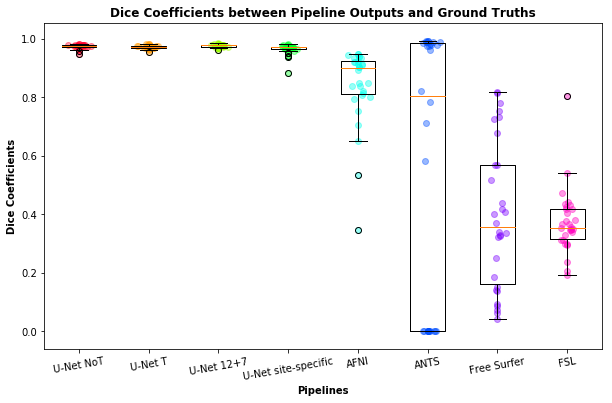

In [167]:
# Monkey Skullstripping

############
#   Dice   #
############

model = ['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific','AFNI','ANTS','Free Surfer','FSL']
dice = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice.mat')
dice = dice['dice']

xs, ys = [], []

for i, m in enumerate(model):
    xs.append(np.concatenate((np.ones(5)*(i+1), np.random.normal(i+1, 0.06, 23), np.ones(2)*(i+1)), axis=0))
    d = dice[i,:].tolist()
    d.sort()
    ys.append(d)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Dice Coefficients between Pipeline Outputs and Ground Truths',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('Dice Coefficients',fontweight='bold')
ax.boxplot(np.transpose(dice), labels=model)
plt.xticks(rotation=10)

clevels = np.linspace(0., 1., len(model))
for x, y, clevel in zip(xs, ys, clevels):
    # ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.6, s=8)
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice.png')

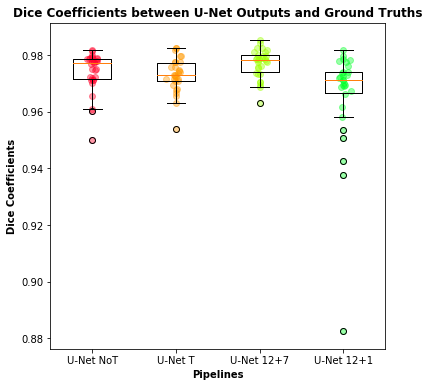

In [13]:
###################
#  Dice  Zoom-in  #
###################

fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Dice Coefficients between U-Net Outputs and Ground Truths',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('Dice Coefficients',fontweight='bold')
ax.boxplot(np.transpose(dice[0:4,:]), labels=['U-Net NoT','U-Net T','U-Net 12+7','U-Net 12+1'])
# plt.xticks(rotation=20)

for x, y, clevel in zip(xs[0:4], ys[0:4], clevels[0:4]):
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice_unet.png')

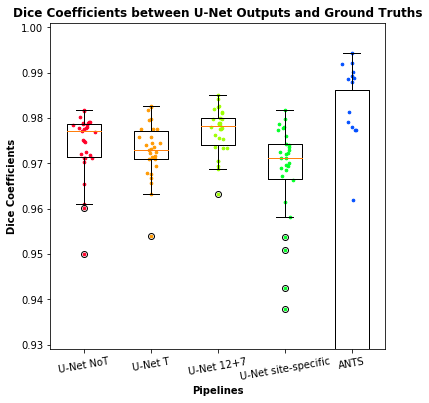

In [170]:
###################
#  Dice  Zoom-in  #
###################

fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Dice Coefficients between U-Net Outputs and Ground Truths',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('Dice Coefficients',fontweight='bold')
ax.set_ylim(0.929,1.001)
ax.boxplot(np.transpose(np.vstack((dice[0:4,:],dice[5,:]))), labels=['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific','ANTS'])
plt.xticks(rotation=10)

xstack=np.vstack((xs[0:4],xs[4]))
ystack=np.vstack((ys[0:4],ys[5]))
cstack=np.hstack((clevels[0:4],clevels[5]))

for x, y, clevel in zip(xstack, ystack, cstack):
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=1, s=7)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice_unet_ants.png')

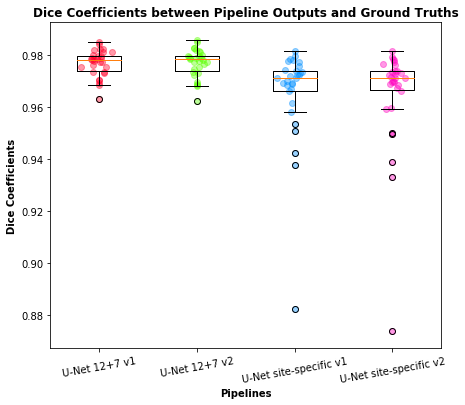

In [5]:
###########################################
#   Dice fill-hole algorithm comparison   #
###########################################

from matplotlib import cm

model = ['U-Net 12+7 v1','U-Net 12+7 v2','U-Net site-specific v1','U-Net site-specific v2']
dice = sio.loadmat('/Users/xinhui.li/Documents/monkey-skullstrip/fillhole/dice_fillhole.mat')
dice = dice['dice']

xs, ys = [], []

for i, m in enumerate(model):
    xs.append(np.concatenate((np.ones(5)*(i+1), np.random.normal(i+1, 0.06, 23), np.ones(2)*(i+1)), axis=0))
    d = dice[i,:].tolist()
    d.sort()
    ys.append(d)

fig, ax = plt.subplots(figsize=(7,6))
ax.set_title('Dice Coefficients between Pipeline Outputs and Ground Truths',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('Dice Coefficients',fontweight='bold')
ax.boxplot(np.transpose(dice), labels=model)
plt.xticks(rotation=10)

clevels = np.linspace(0., 1., len(model))
for x, y, clevel in zip(xs, ys, clevels):
    # ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.6, s=8)
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/fillhole/dice.png',dpi=300)

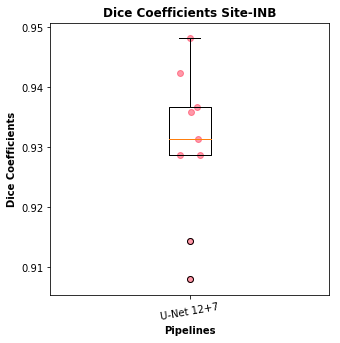

In [7]:
#####################
#   Mask from Pam   #
#####################

model = ['U-Net 12+7']
dice = sio.loadmat('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/pam_lisa/dice_pam_inb_unet127filled.mat')
dice = dice['dice']

xs, ys = [], []

for i, m in enumerate(model):
    xs.append(np.concatenate((np.ones(2)*(i+1), np.random.normal(i+1, 0.03, 6), np.ones(1)*(i+1)), axis=0))
    d = dice[i,:].tolist()
    d.sort()
    ys.append(d)

fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Dice Coefficients Site-INB',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('Dice Coefficients',fontweight='bold')
ax.boxplot(np.transpose(dice), labels=model)
plt.xticks(rotation=10)

clevels = np.linspace(0., 1., len(model))
for x, y, clevel in zip(xs, ys, clevels):
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/pam_lisa/dice_inb.png')

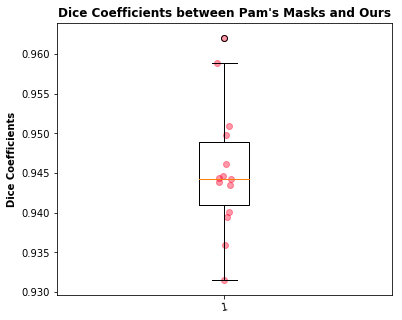

In [38]:
dice = sio.loadmat('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/pam_lisa/dice_pam16.mat')
dice = dice['dice'][0]

a = np.delete(dice,-1)
b = np.delete(a,-6)

xs, ys = [], []

xs.append(np.concatenate((np.ones(1)*(i+1), np.random.normal(i+1, 0.03, 12), np.ones(1)*(i+1)), axis=0))
d = b.tolist()
d.sort()
ys.append(d)

fig, ax = plt.subplots(figsize=(6,5))
ax.set_title("Dice Coefficients between Pam's Masks and Ours" ,fontweight='bold')
# ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('Dice Coefficients',fontweight='bold')
ax.boxplot(b)
plt.xticks(rotation=10)

clevels = np.linspace(0., 1., len(model))
for x, y, clevel in zip(xs, ys, clevels):
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-skullstrip/scripts/pam_lisa/dice_gt.png')

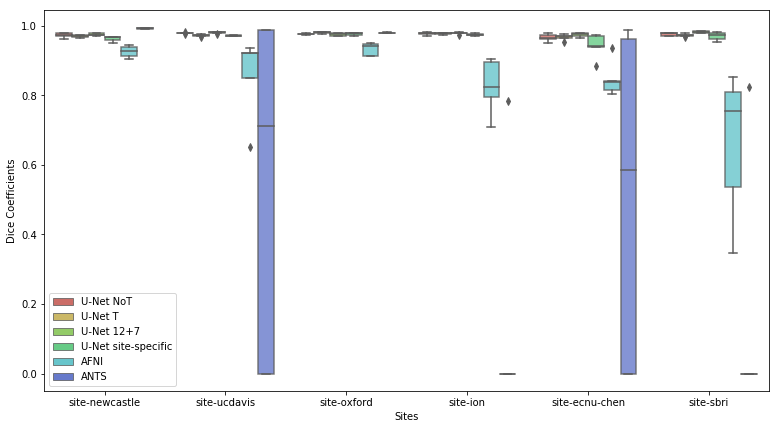

In [217]:
data = []
model = ['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific','AFNI','ANTS']
site_list = ['site-newcastle', 'site-ucdavis', 'site-oxford', 'site-ion', 'site-ecnu-chen', 'site-sbri']

for i,site in enumerate(site_list):
    for j,pipeline in enumerate(model):
        for k in range(5):
            row = [site, pipeline, k, dice[j,i*5+k]]
            # print(row)
            data.append(row)
        
df = pd.DataFrame(data=data, columns=['Sites', 'Pipelines', 'Sub', 'Dice Coefficients'])

fig, ax = plt.subplots(figsize=(13,7))
ax = sns.boxplot(x="Sites",y="Dice Coefficients",hue="Pipelines",data=df,palette=sns.color_palette("hls", 8),boxprops=dict(alpha=0.8))
ax.legend(loc=3)

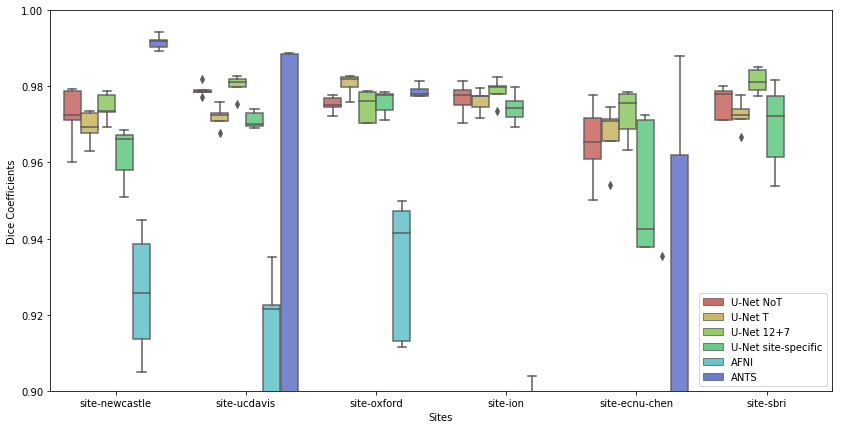

In [227]:
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.boxplot(x="Sites",y="Dice Coefficients",hue="Pipelines",data=df,palette=sns.color_palette("hls", 8),boxprops=dict(alpha=0.9))
# ax = sns.swarmplot(x="Sites",y="Dice Coefficients",hue="Pipelines",data=df,color=".2")
ax.set_ylim(0.9,1)
ax.legend(loc=4)

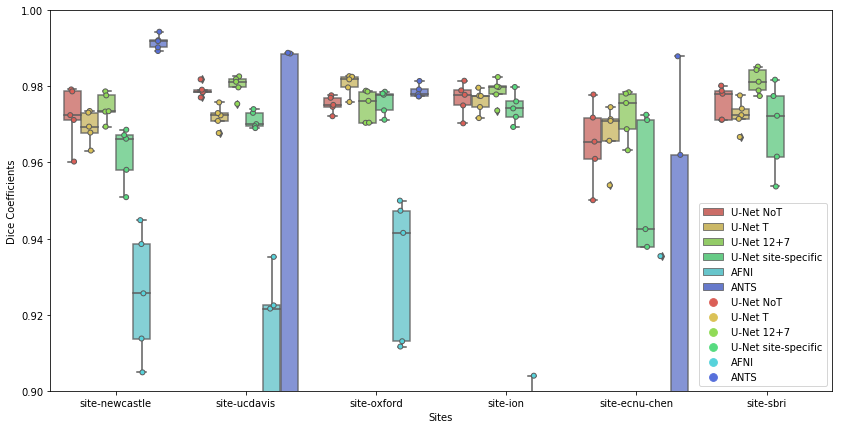

In [237]:
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.boxplot(x="Sites",y="Dice Coefficients",hue="Pipelines",data=df,palette=sns.color_palette("hls", 8),boxprops=dict(alpha=0.8))
ax=sns.stripplot(x="Sites",y="Dice Coefficients",data=df,jitter=True,dodge=True, marker='o',hue='Pipelines',palette=sns.color_palette("hls", 8),linewidth=1)
ax.set_ylim(0.9,1)
ax.legend(loc=4)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice_box_strip.png')

In [210]:
data = []
model = ['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific','AFNI','ANTS','Free Surfer','FSL']
site_list = ['site-newcastle', 'site-ucdavis', 'site-oxford', 'site-ion', 'site-ecnu-chen', 'site-sbri']

for i,site in enumerate(site_list):
    for j,pipeline in enumerate(model):
        for k in range(5):
            row = [site, pipeline, k, dice[j,i*5+k]]
            # print(row)
            data.append(row)
        
df = pd.DataFrame(data=data, columns=['Sites', 'Pipelines', 'Sub', 'Dice Coefficients'])

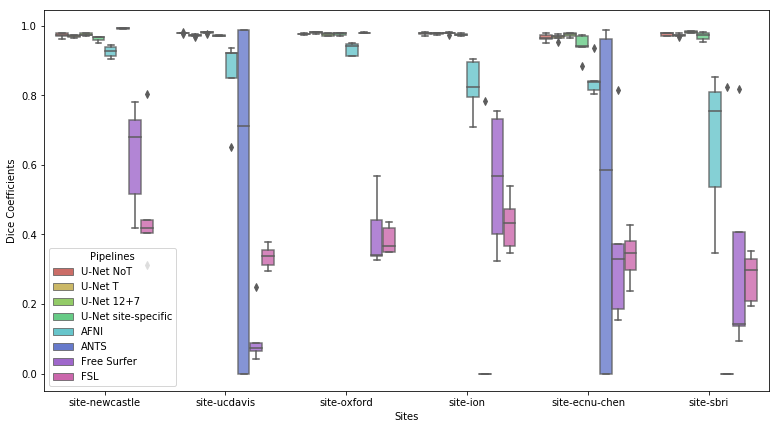

In [214]:
fig, ax = plt.subplots(figsize=(13,7))
ax = sns.boxplot(x="Sites",y="Dice Coefficients",hue="Pipelines",data=df,palette=sns.color_palette("hls", 8),boxprops=dict(alpha=0.8))
# ax = sns.swarmplot(x="Sites",y="Dice Coefficients",hue="Pipelines",color='dimgray',data=df)
# plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice_site.png')

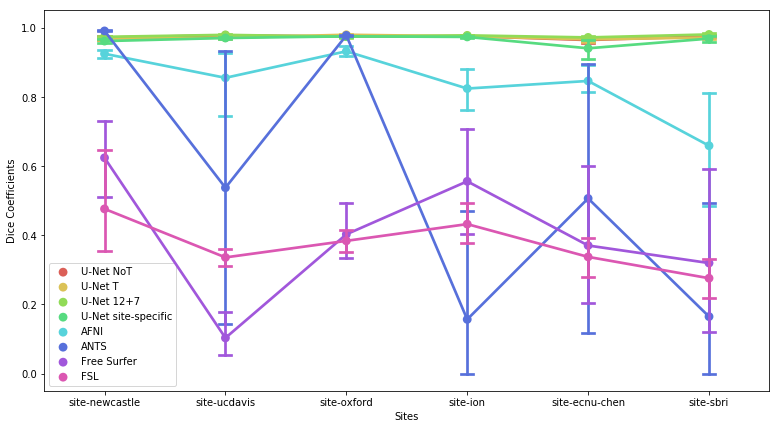

In [172]:
#######################
#   Dice Point Plot   #
#######################
fig, ax = plt.subplots(figsize=(13,7))
ax = sns.pointplot(x="Sites", y="Dice Coefficients", hue="Pipelines", data=df, capsize=.1, palette=sns.color_palette("hls", 8))
ax.legend(loc=3)
# plt.xticks(rotation=20)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice_point.png')

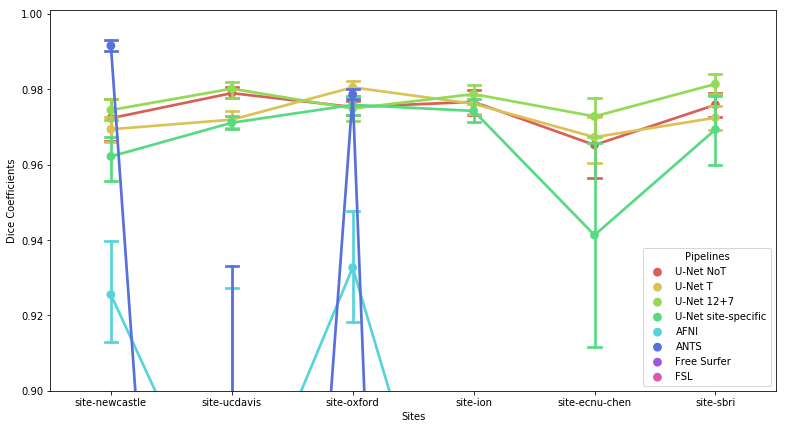

In [173]:
fig, ax = plt.subplots(figsize=(13,7))
ax = sns.pointplot(x="Sites", y="Dice Coefficients", hue="Pipelines", data=df, capsize=.1, palette=sns.color_palette("hls", 8))
# ax.legend(loc=3)
ax.set_ylim(0.9,1.001)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice_point_up.png')

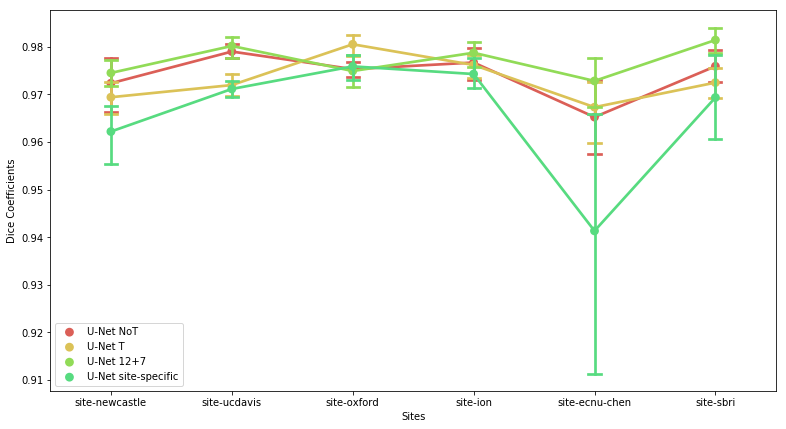

In [239]:
data = []
model = ['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific']
site_list = ['site-newcastle', 'site-ucdavis', 'site-oxford', 'site-ion', 'site-ecnu-chen', 'site-sbri']

for i,site in enumerate(site_list):
    for j,pipeline in enumerate(model):
        for k in range(5):
            row = [site, pipeline, k, dice[j,i*5+k]]
            # print(row)
            data.append(row)
        
df = pd.DataFrame(data=data, columns=['Sites', 'Pipelines', 'Sub', 'Dice Coefficients'])

fig, ax = plt.subplots(figsize=(13,7))
ax = sns.pointplot(x="Sites", y="Dice Coefficients", hue="Pipelines", data=df, capsize=.1, palette=sns.color_palette("hls", 8))
ax.legend(loc=3)
# plt.xticks(rotation=20)
# plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice_point_unet.png')

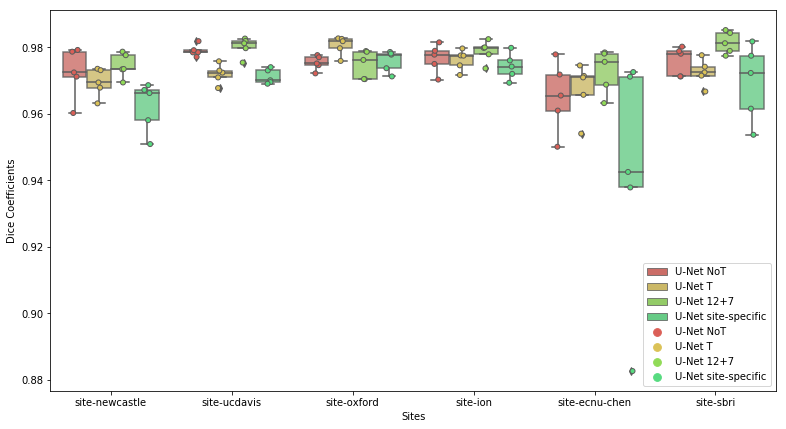

In [245]:
fig, ax = plt.subplots(figsize=(13,7))
ax = sns.boxplot(x="Sites", y="Dice Coefficients", hue="Pipelines", data=df, dodge=True, palette=sns.color_palette("hls", 8),boxprops=dict(alpha=0.8))
ax=sns.stripplot(x="Sites",y="Dice Coefficients",data=df,jitter=True,dodge=True,marker='o',hue='Pipelines',palette=sns.color_palette("hls", 8),linewidth=1)
ax.legend(loc=4)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/dice_site_unet.png')

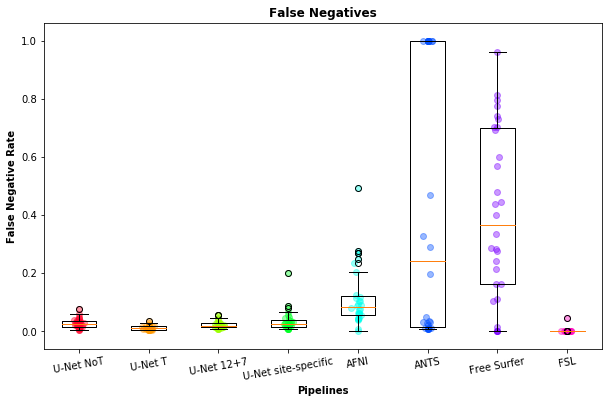

In [176]:
####################
#   FNR Box Plot   #
####################

model = ['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific','AFNI','ANTS','Free Surfer','FSL']
fn = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/FN.mat')
fn = fn['FN']
tp = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/TP.mat')
tp = tp['TP']
specificity = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/specificity.mat')
specificity = specificity['specificity']


xs, fprs, fnrs = [], [], []

for i,m in enumerate(model):
    xs.append(np.concatenate((np.ones(5)*(i+1), np.random.normal(i+1, 0.04, 20), np.ones(5)*(i+1)), axis=0))
    fnr = fn[i,:]/(fn[i,:]+tp[i,:])
    n = fnr.tolist()
    n.sort()
    fnrs.append(n)
    fpr = 1-specificity[i,:]
    p = fpr.tolist()
    p.sort()
    fprs.append(p)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('False Negatives',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('False Negative Rate',fontweight='bold')
ax.boxplot(np.transpose(np.array(fnrs)), labels=model)
plt.xticks(rotation=10)

clevels = np.linspace(0., 1., len(model))
for x, y, clevel in zip(xs, fnrs, clevels):
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/fn.png')

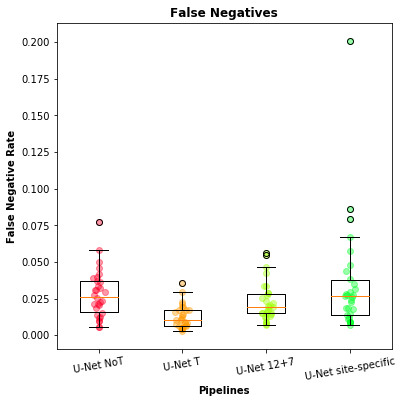

In [177]:
###########################
#   FNR Box Plot Zoom-in  #
###########################

fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('False Negatives',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('False Negative Rate',fontweight='bold')
ax.boxplot(np.transpose(np.array(fnrs)[0:4,:]), labels=['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific'])
plt.xticks(rotation=10)

for x, y, clevel in zip(xs[0:4], fnrs[0:4], clevels[0:4]):
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/fn_unet.png')

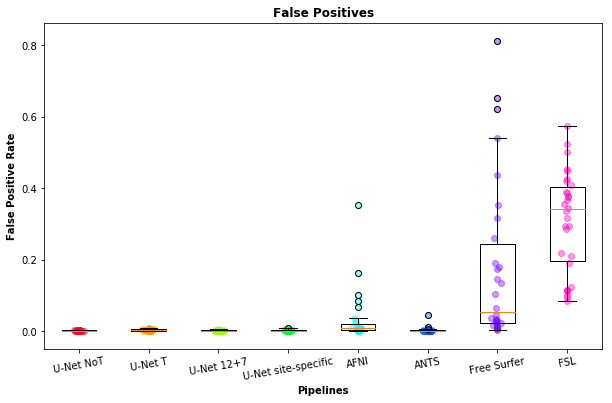

In [180]:
####################
#   FPR Box Plot   #
####################

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('False Positives',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('False Positive Rate',fontweight='bold')
ax.boxplot(np.transpose(np.array(fprs)), labels=model)
plt.xticks(rotation=10)
clevels = np.linspace(0., 1., len(model))
for x, y, clevel in zip(xs, fprs, clevels):
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/fp.png')

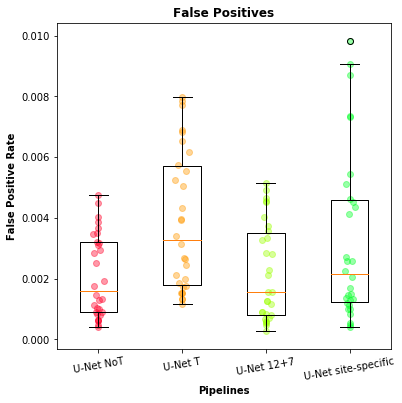

In [181]:
###########################
#   FPR Box Plot Zoom-in  #
###########################

fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('False Positives',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('False Positive Rate',fontweight='bold')
ax.boxplot(np.transpose(np.array(fprs)[0:4,:]), labels=['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific'])
plt.xticks(rotation=10)
for x, y, clevel in zip(xs[0:4], fprs[0:4], clevels[0:4]):
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/fp_unet.png')

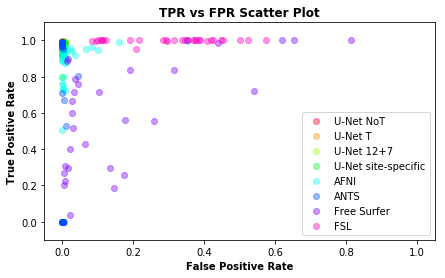

In [182]:
#########
#  ROC  #
#########

# x: FPR, y: TPR
model = ['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific','AFNI','ANTS','Free Surfer','FSL']
sensitivity = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/sensitivity.mat')
sensitivity = sensitivity['sensitivity']
specificity = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/specificity.mat')
specificity = specificity['specificity']

fig, ax = plt.subplots(figsize=(7,4))
for i,m in enumerate(model):
    tpr = sensitivity[i,:]
    fpr = 1-specificity[i,:]
    ax.scatter(fpr, tpr, c=cm.gist_rainbow(clevels[i]), alpha=0.4, label=m)
ax.legend(loc=4)
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.1,1.1)
ax.set_title('TPR vs FPR Scatter Plot',fontweight='bold')
ax.set_xlabel('False Positive Rate',fontweight='bold')
ax.set_ylabel('True Positive Rate',fontweight='bold')
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/roc.png')

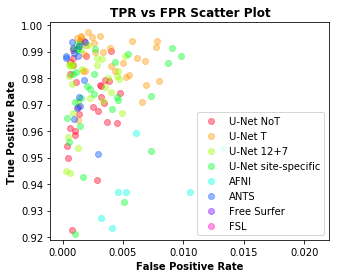

In [183]:
##################
#  ROC  Zoom-in  #
##################

fig, ax = plt.subplots(figsize=(5,4))
for i,m in enumerate(model):
    tpr = sensitivity[i,:]
    fpr = 1-specificity[i,:]
    ax.scatter(fpr, tpr, c=cm.gist_rainbow(clevels[i]), alpha=0.4, label=m)
ax.legend(loc=4)
ax.set_xlim(-0.001,0.0221)
ax.set_ylim(0.919,1.001)
ax.set_title('TPR vs FPR Scatter Plot',fontweight='bold')
ax.set_xlabel('False Positive Rate',fontweight='bold')
ax.set_ylabel('True Positive Rate',fontweight='bold')
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/roc_upperleft.png')

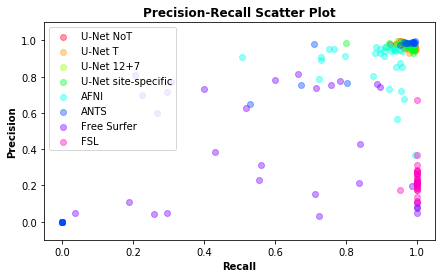

In [186]:
######################
#  Precision-Recall  #
######################

# the precision (y-axis) and the recall (x-axis)

model = ['U-Net NoT','U-Net T','U-Net 12+7','U-Net site-specific','AFNI','ANTS','Free Surfer','FSL']
sensitivity = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/sensitivity.mat')
sensitivity = sensitivity['sensitivity']
precision = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/precision.mat')
precision = precision['precision']

fig, ax = plt.subplots(figsize=(7,4))
for i,m in enumerate(model):
    recall = sensitivity[i,:]
    prec = precision[i,:]
    ax.scatter(recall, prec, c=cm.gist_rainbow(clevels[i]), alpha=0.4, label=m)
ax.legend(loc=2)
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.1,1.1)
ax.set_title('Precision-Recall Scatter Plot',fontweight='bold')
ax.set_xlabel('Recall',fontweight='bold')
ax.set_ylabel('Precision',fontweight='bold')
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/precision-recall.png')

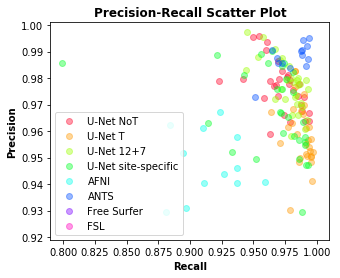

In [189]:
##############################
#  Precision-Recall Zoom-in  #
##############################

fig, ax = plt.subplots(figsize=(5,4))
for i,m in enumerate(model):
    recall = sensitivity[i,:]
    prec = precision[i,:]
    ax.scatter(recall, prec, c=cm.gist_rainbow(clevels[i]), alpha=0.4, label=m)
ax.legend(loc=3)
ax.set_xlim(0.79,1.01)
ax.set_ylim(0.919,1.001)
ax.set_title('Precision-Recall Scatter Plot',fontweight='bold')
ax.set_xlabel('Recall',fontweight='bold')
ax.set_ylabel('Precision',fontweight='bold')
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/skullstrip/scripts/v3/precision-recall_upperright.png')

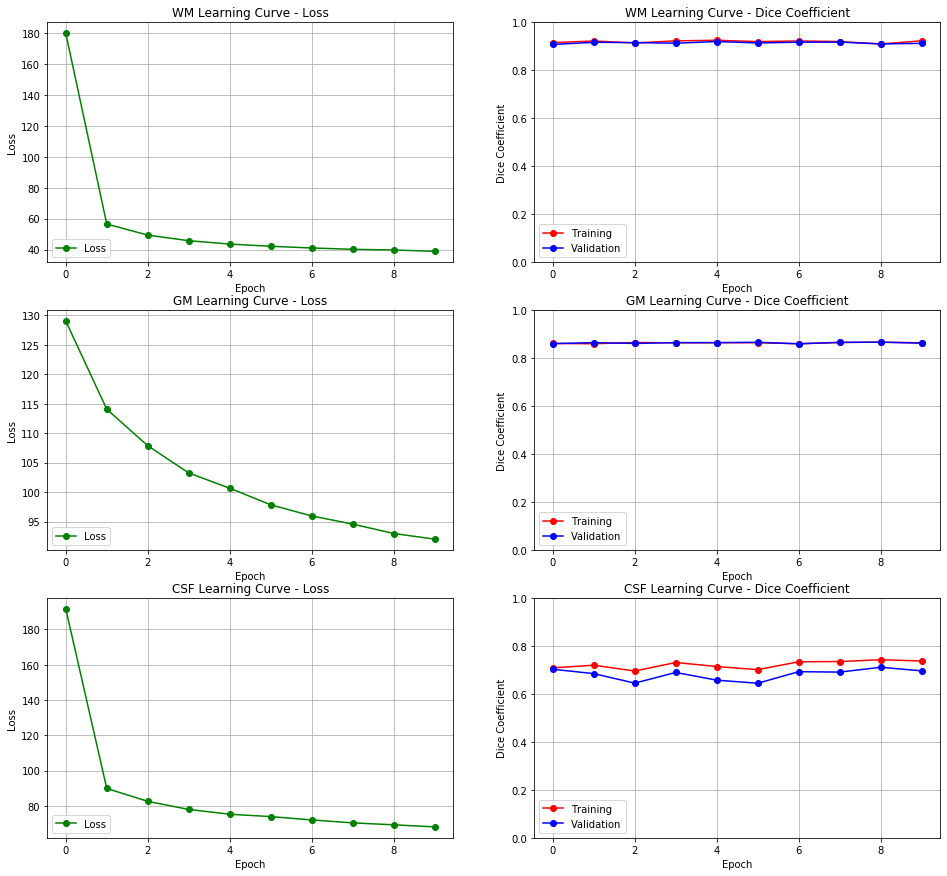

In [121]:
"""
Plot learning curves - dice and loss 
"""

file_path = ['/Users/xinhui.li/Documents/research/data/out/aws/hcp/wm/DiceAndLoss.pkl',
              '/Users/xinhui.li/Documents/research/data/out/aws/hcp/gm/DiceAndLoss.pkl',
              '/Users/xinhui.li/Documents/research/data/out/aws/hcp/csf/DiceAndLoss.pkl']

# ['/Users/xinhui.li/Documents/research/data/out/aws/monkey/wm/DiceAndLoss.pkl',
            # '/Users/xinhui.li/Documents/research/data/out/aws/monkey/gm/DiceAndLoss.pkl',
            # '/Users/xinhui.li/Documents/research/data/out/aws/monkey/csf/DiceAndLoss.pkl']

dice_loss = pickle.load(open(file_path[0], "rb"), encoding="latin1")

loss = []
dice_train = []
dice_val = []

for i in file_path:
    dice_loss = pickle.load(open(i, "rb"), encoding="latin1")
    loss.append(dice_loss[1])
    dice_train.append([x[0] for x in dice_loss[0]]) # check with Xindi?
    dice_val.append([x[1] for x in dice_loss[0]])

epoch = range(len(loss[0]))

# Plot learning curve
row = 3
col = 2
legend = ["Training", "Validation"]
label = ["Loss", "Dice Coefficient"]
tissue = ["WM", "GM", "CSF"]

_, axes = plt.subplots(row, col, figsize=(16, 15))

for i in range(row):
    for j in range(col):
        if j == 1:
            axes[i,j].plot(epoch, dice_train[i], 'o-', color="r", label=legend[0])
            axes[i,j].plot(epoch, dice_val[i], 'o-', color="b", label=legend[1])
            axes[i,j].set_ylim(0,1)
        else:
            axes[i,j].plot(epoch, loss[i], 'o-', color="g", label=label[j])
        axes[i,j].set_title(tissue[i]+" Learning Curve - "+label[j])
        axes[i,j].set_ylabel(label[j])
        axes[i,j].grid()
        axes[i,j].legend(loc="lower left")
        axes[i,j].set_xlabel("Epoch")


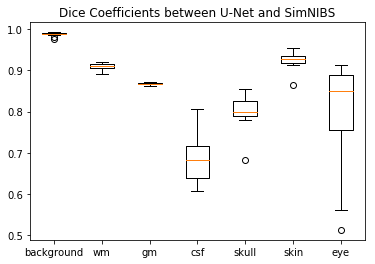

In [70]:
"""
Plot dice coefficients of tissue masks between U-Net and SimNIBS
"""

tissue = ['background','wm','gm','csf','skull','skin','eye']
dice = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/data/out/colab/HBN_test_hnu_hbn_preT1/dice.mat')
dice = dice['dice']

fig, ax = plt.subplots()
ax.set_title('Dice Coefficients between U-Net and SimNIBS')
ax.boxplot(np.transpose(dice), labels=tissue)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/data/out/colab/HBN_test_hnu_hbn_preT1/dice.png')
plt.show()

In [13]:
dataset = ['HCP']*15 + ['HCP+HBN']*15

dice = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/data/out/colab/hbn_test_hnu_train_pT1/dice.mat')
dice = dice['dice']
dice = np.transpose(dice)

dice_hbn = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/data/out/colab/hbn_test_hnu_hbn_train_pT1/dice.mat')
dice_hbn = dice_hbn['dice']
dice_hbn = np.transpose(dice_hbn)

dice_group = np.vstack((dice, dice_hbn))

In [77]:
data = []
for i,j in enumerate(dice_group.tolist()):
    for k,l in enumerate(j): 
        row = [l, tissue[k], dataset[i]]
        data.append(row)
        
df = pd.DataFrame(data=data, columns=['dice', 'tissue', 'dataset'])

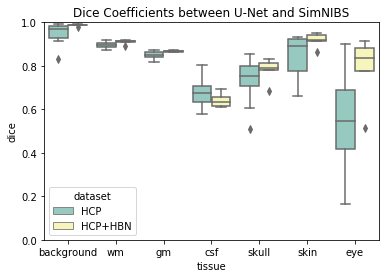

In [78]:
ax = sns.boxplot(x="tissue", y="dice", hue="dataset",
                 data=df, palette="Set3")
ax.set_ylim([0,1])
ax.set_title('Dice Coefficients between U-Net and SimNIBS')
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/data/out/colab/figures/HBN_pT1_dice.png')

In [ ]:
# Monkey Skullstripping

############
#   Dice   #
############

model = ['WM','GM','CSF']
dice = sio.loadmat('/Users/xinhui.li/Documents/monkey-segmentation/data/monkey/site-mountsinai-P/dice_seg_unet.mat')
dice = dice['dice']

xs, ys = [], []

for i, m in enumerate(model):
    xs.append(np.concatenate((np.ones(5)*(i+1), np.random.normal(i+1, 0.06, 23), np.ones(2)*(i+1)), axis=0))
    d = dice[i,:].tolist()
    d.sort()
    ys.append(d)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Dice Coefficients between Pipeline Outputs and Ground Truths',fontweight='bold')
ax.set_xlabel('Pipelines',fontweight='bold')
ax.set_ylabel('Dice Coefficients',fontweight='bold')
ax.boxplot(np.transpose(dice), labels=model)
plt.xticks(rotation=10)

clevels = np.linspace(0., 1., len(model))
for x, y, clevel in zip(xs, ys, clevels):
    # ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.6, s=8)
    ax.scatter(x, y, c=cm.gist_rainbow(clevel), alpha=0.4)
plt.savefig('/Users/xinhui.li/Documents/monkey-segmentation/data/monkey/site-mountsinai-P/dice.png')